In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###
Dataset from kaggle for Loan Default prediction
Link to dataset - https://www.kaggle.com/datasets/nikhil1e9/loan-default/?select=Loan_default.csv

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
data = pd.read_csv("data/Loan_default.csv")

data.head(10)

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   
5  A9S62RQ7US   25   90298       90448          720              18   
6  H8GXPAOS71   38  111188      177025          429              80   
7  0HGZQKJ36W   56  126802      155511          531              67   
8  1R0N3LGNRJ   36   42053       92357          827              83   
9  CM9L1GTT2P   40  132784      228510          480             114   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   
5               2         22.72        24      0.10  High School   
6               1         19.11        12      0.16   Bachelor's   
7               4          8.15        60      0.43          PhD   
8               1         23.94        48      0.20   Bachelor's   
9               4          9.09        48      0.33  High School   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   
5     Unemployed        Single         Yes            No    Business   
6     Unemployed        Single         Yes            No        Home   
7      Full-time       Married          No            No        Home   
8  Self-employed      Divorced         Yes            No   Education   
9  Self-employed       Married         Yes            No       Other   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0  
5         Yes        1  
6         Yes        0  
7         Yes        0  
8          No        1  
9         Yes        0

In [6]:
data['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [7]:
data.columns = data.columns.str.lower()

data.columns

Index(['loanid', 'age', 'income', 'loanamount', 'creditscore',
       'monthsemployed', 'numcreditlines', 'interestrate', 'loanterm',
       'dtiratio', 'education', 'employmenttype', 'maritalstatus',
       'hasmortgage', 'hasdependents', 'loanpurpose', 'hascosigner',
       'default'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loanid          255347 non-null  object 
 1   age             255347 non-null  int64  
 2   income          255347 non-null  int64  
 3   loanamount      255347 non-null  int64  
 4   creditscore     255347 non-null  int64  
 5   monthsemployed  255347 non-null  int64  
 6   numcreditlines  255347 non-null  int64  
 7   interestrate    255347 non-null  float64
 8   loanterm        255347 non-null  int64  
 9   dtiratio        255347 non-null  float64
 10  education       255347 non-null  object 
 11  employmenttype  255347 non-null  object 
 12  maritalstatus   255347 non-null  object 
 13  hasmortgage     255347 non-null  object 
 14  hasdependents   255347 non-null  object 
 15  loanpurpose     255347 non-null  object 
 16  hascosigner     255347 non-null  object 
 17  default   

### Data Cleaning

In [9]:
data.isnull().sum()

loanid            0
age               0
income            0
loanamount        0
creditscore       0
monthsemployed    0
numcreditlines    0
interestrate      0
loanterm          0
dtiratio          0
education         0
employmenttype    0
maritalstatus     0
hasmortgage       0
hasdependents     0
loanpurpose       0
hascosigner       0
default           0
dtype: int64

### Duplicates Values

In [10]:
print(f'Number of duplicate entries: {data.duplicated().sum()}')

Number of duplicate entries: 0


### EDA

#### Categorical Values

In [11]:
catCols = [col for col in data.columns if data[col].dtype=="O"]

In [12]:
catCols.remove("loanid")

catCols

['education',
 'employmenttype',
 'maritalstatus',
 'hasmortgage',
 'hasdependents',
 'loanpurpose',
 'hascosigner']

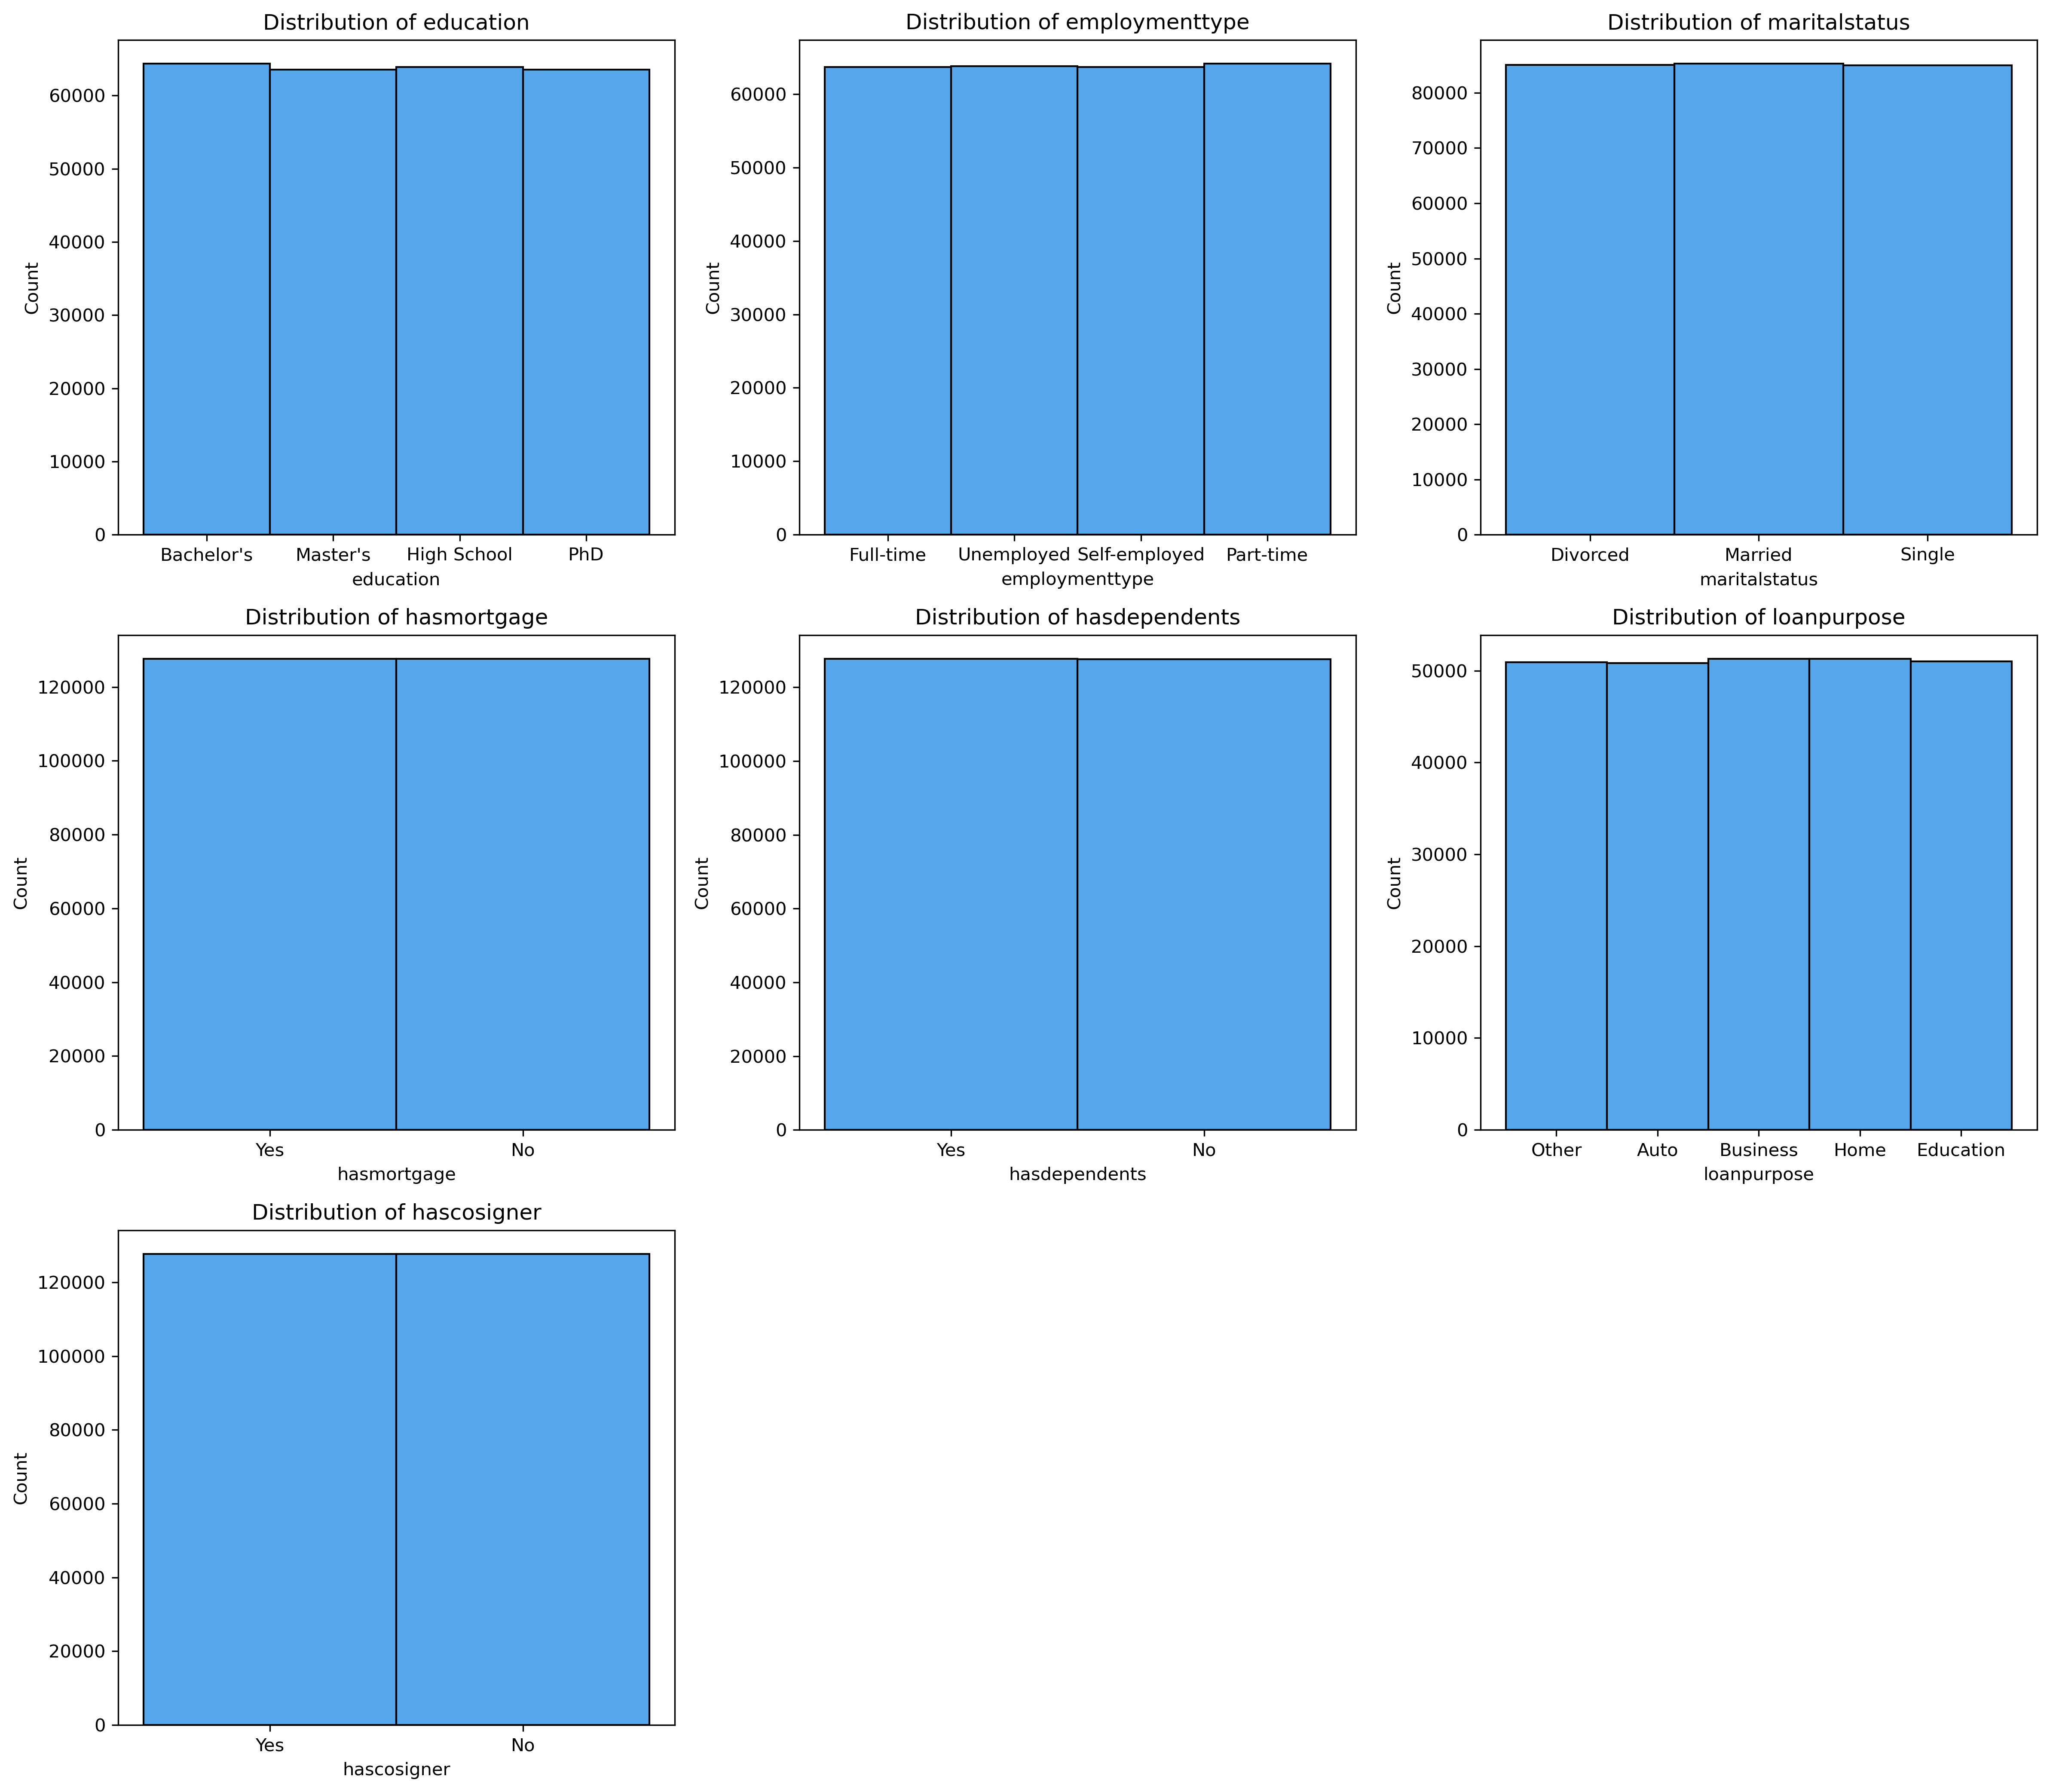

In [13]:
plt.figure(figsize=(16, 14), dpi=300)

for i, col in enumerate(data[catCols].columns, 1):
    plt.subplot(3,3,i)
    plt.title(f"Distribution of {col}")
    
    if data[col].nunique() <= 2:
        sns.histplot(data[col], discrete=True, color='#1E88E5')
        plt.xticks([0, 1])
    else:
        sns.histplot(data[col], discrete=True, bins=(data[col].nunique() - 1), color='#1E88E5')

    plt.tight_layout()
    plt.plot()

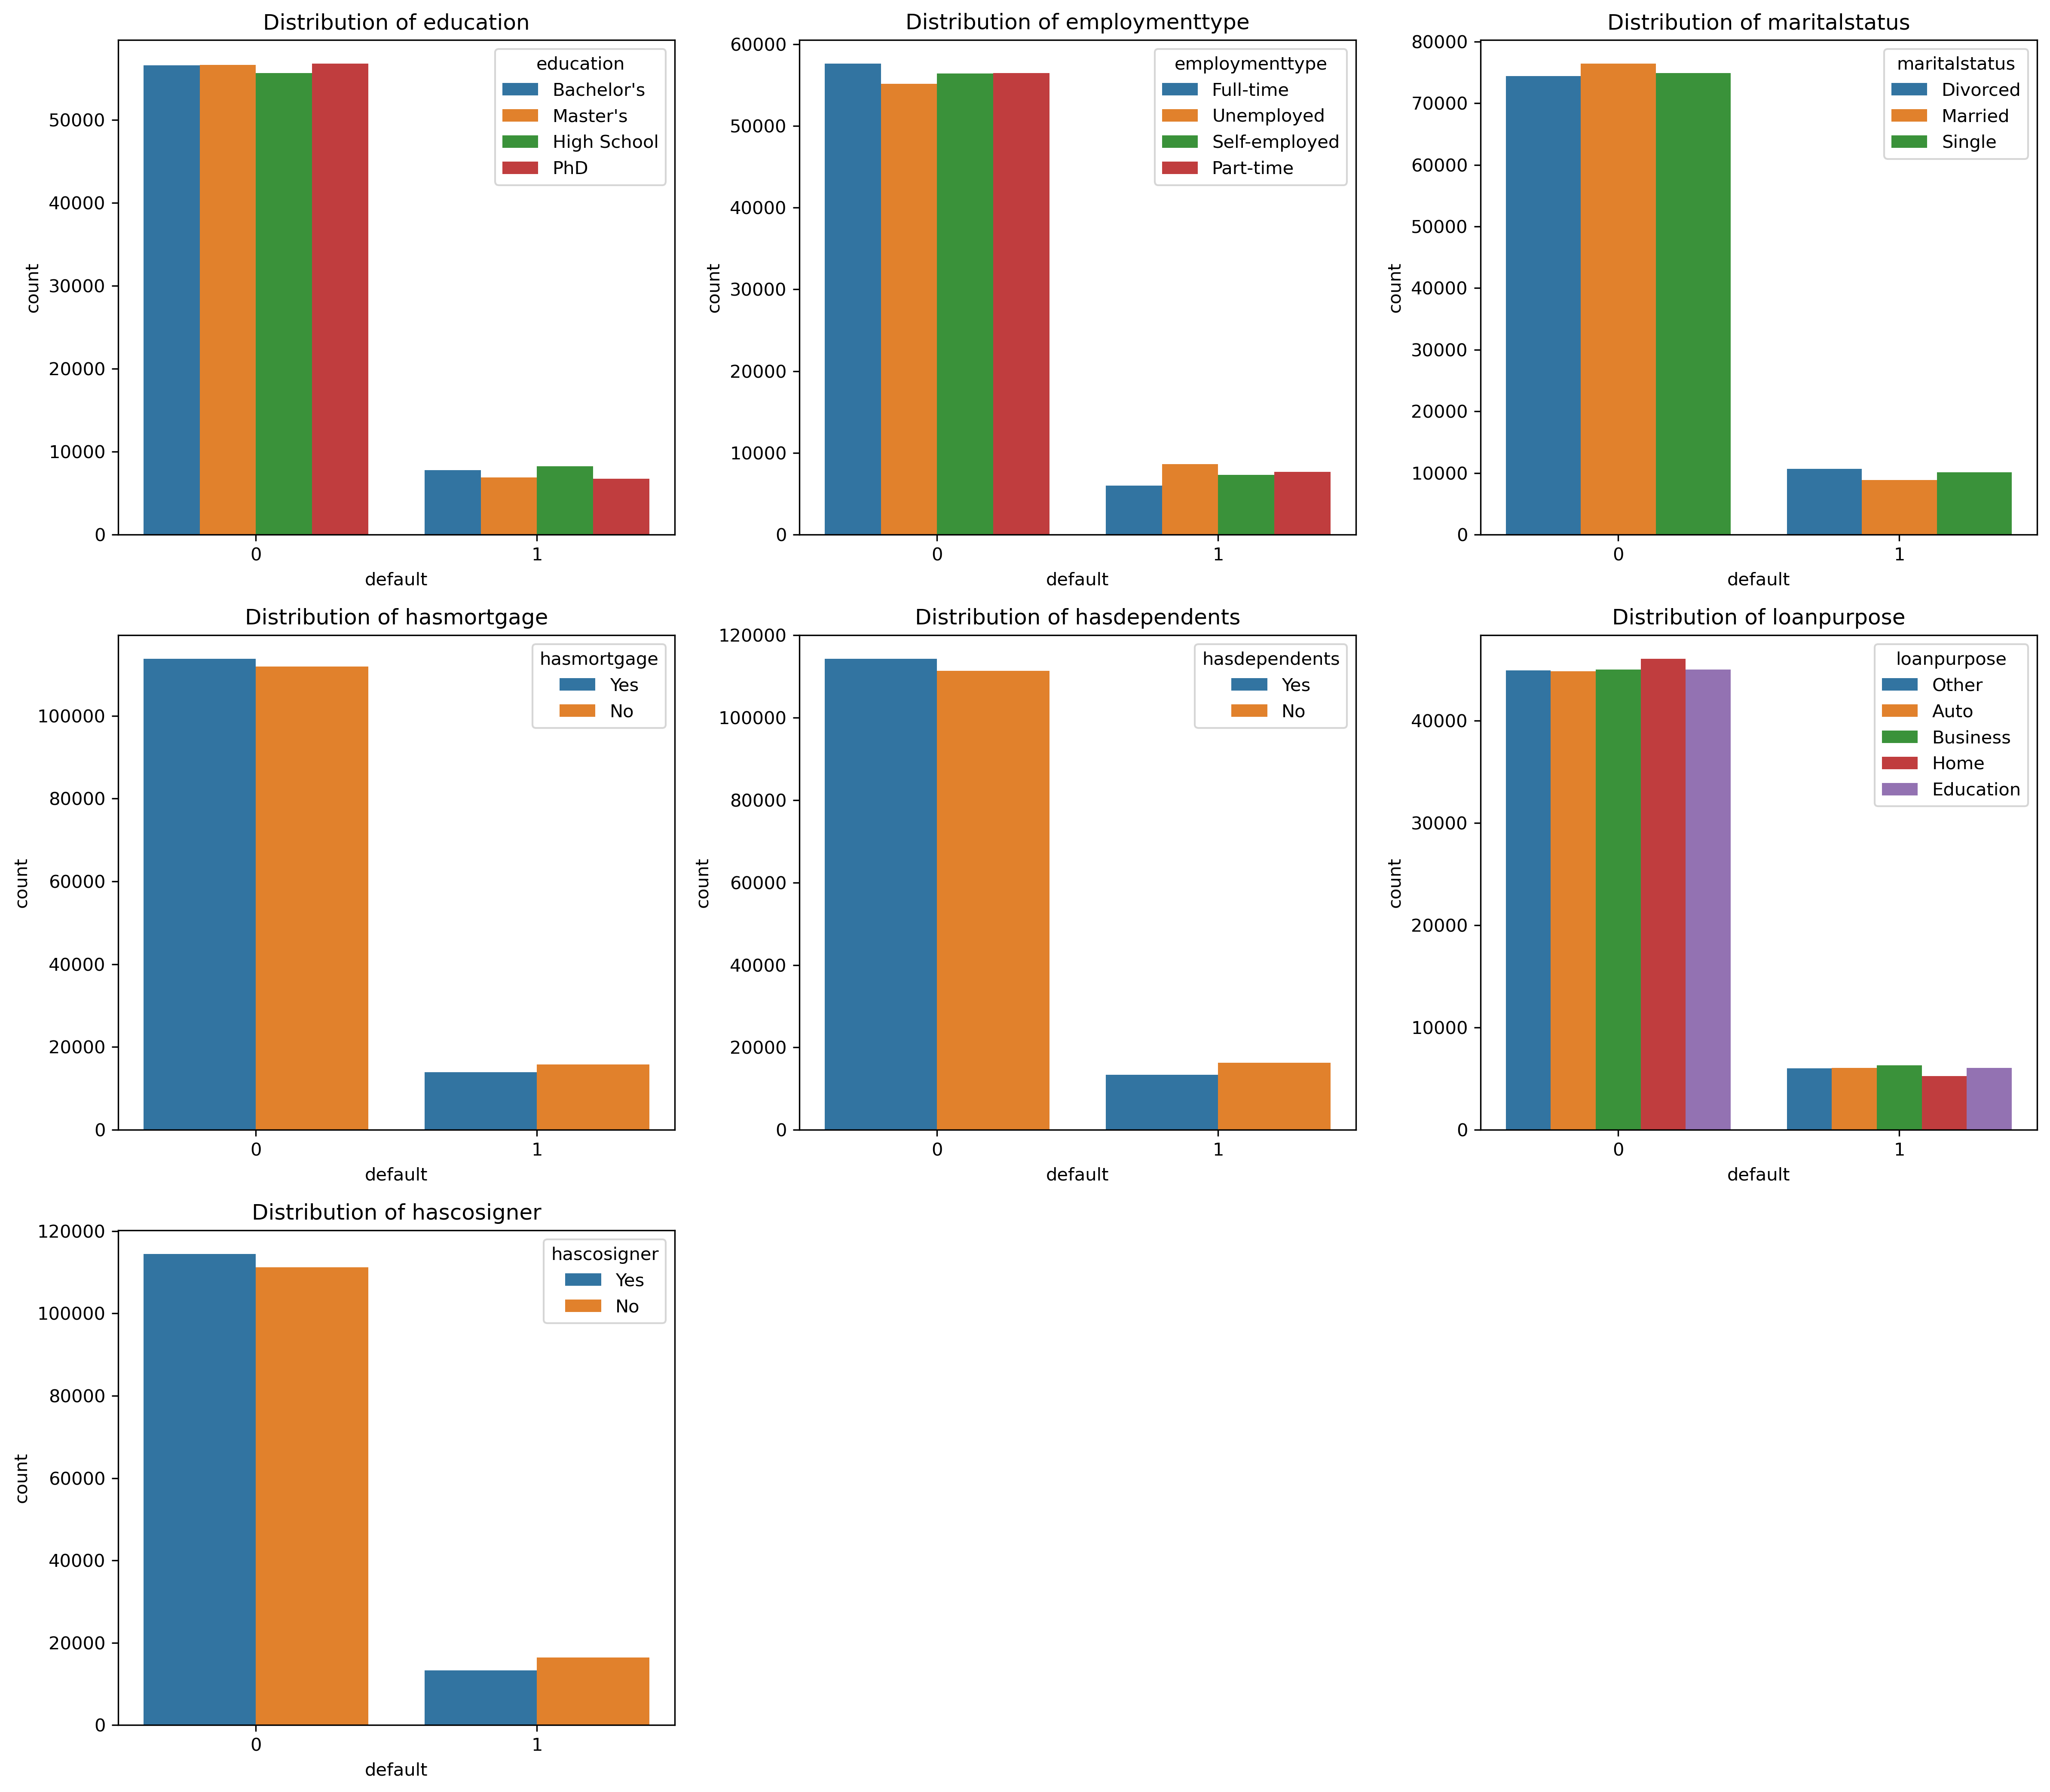

In [14]:
plt.figure(figsize=(16, 14), dpi=300)

for i, col in enumerate(data[catCols].columns, 1):
    plt.subplot(3,3,i)
    plt.title(f"Distribution of {col}")
    
    sns.countplot( x = data['default'] ,  hue= data[col])
    #sns.boxplot(x = data[col], y = data['default'], orient='h',  color='#004D60')

    plt.tight_layout()
    plt.plot()

##### Equal distribution of all values for each categorical column

### Numerical Values

In [15]:
NumCols = ['age', 'income', 'loanamount', 'creditscore',
       'monthsemployed', 'numcreditlines', 'interestrate', 'loanterm',
       'dtiratio']

In [16]:
NumCols

['age',
 'income',
 'loanamount',
 'creditscore',
 'monthsemployed',
 'numcreditlines',
 'interestrate',
 'loanterm',
 'dtiratio']

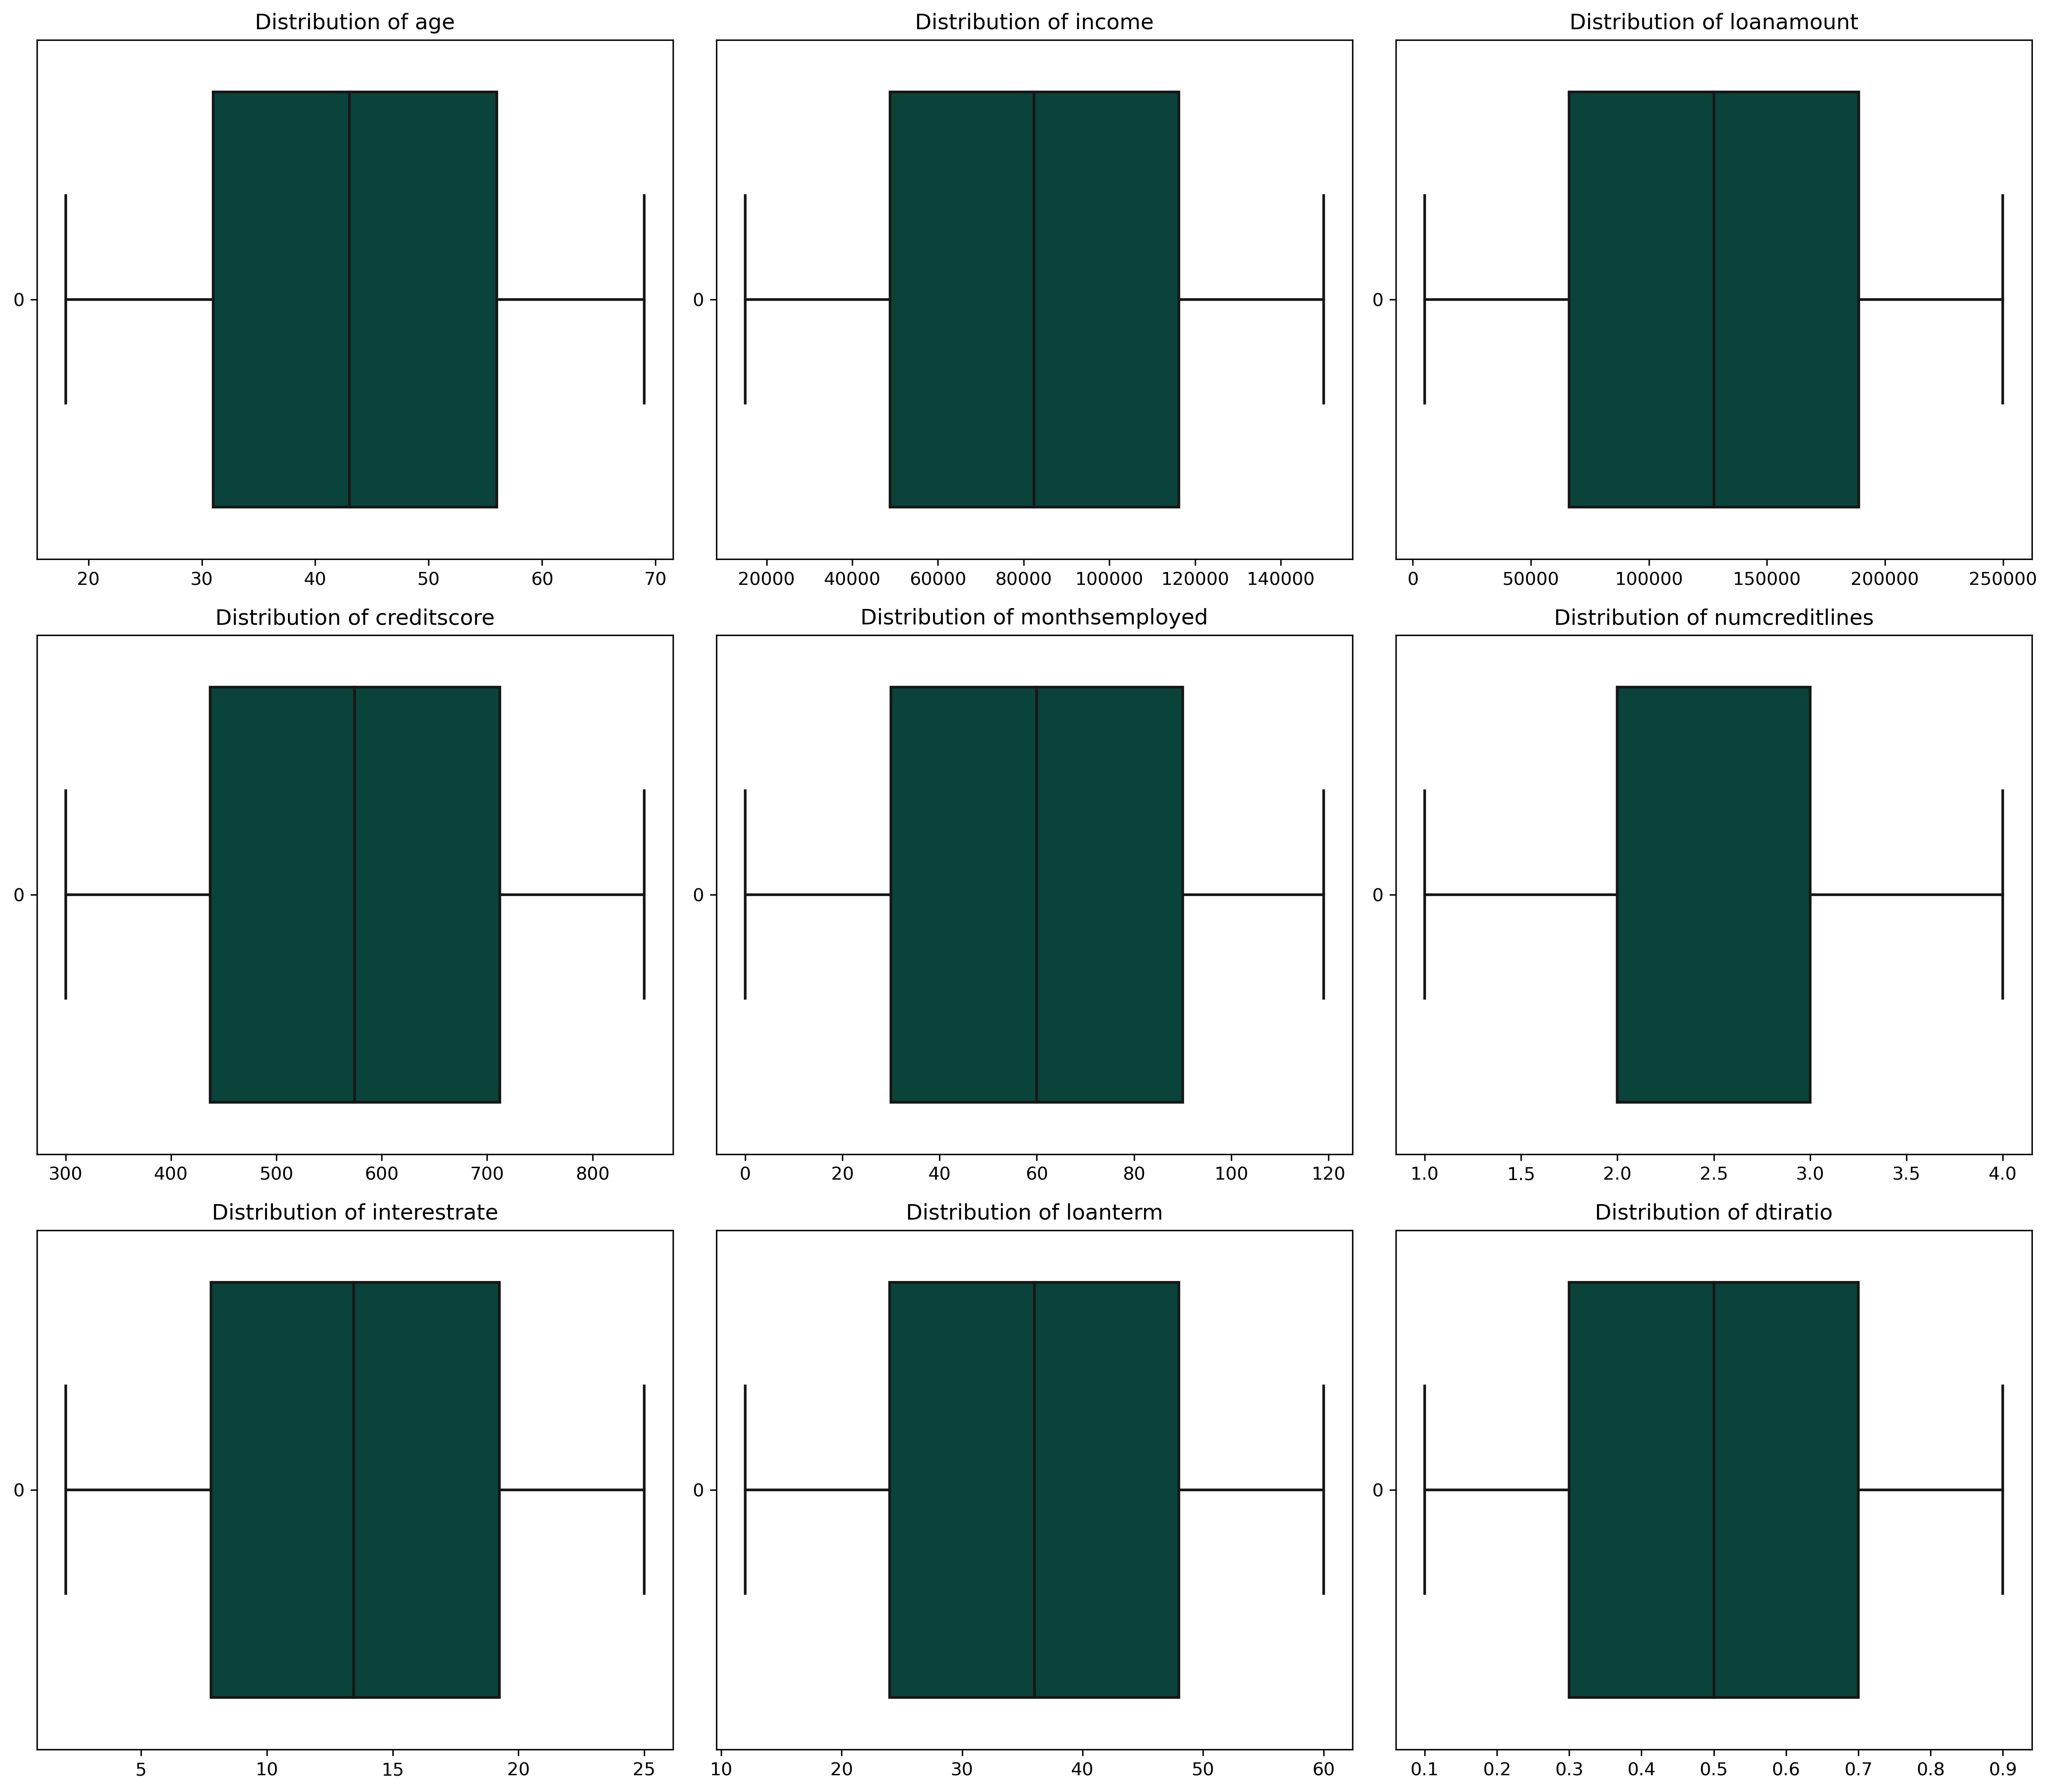

In [17]:
plt.figure(figsize=(16, 14), dpi=300)

for i, col in enumerate(data[NumCols].columns, 1):
    plt.subplot(3,3,i)
    plt.title(f"Distribution of {col}")
    
    sns.boxplot(data[col], orient='h',  color='#004D40')

    plt.tight_layout()
    plt.plot()

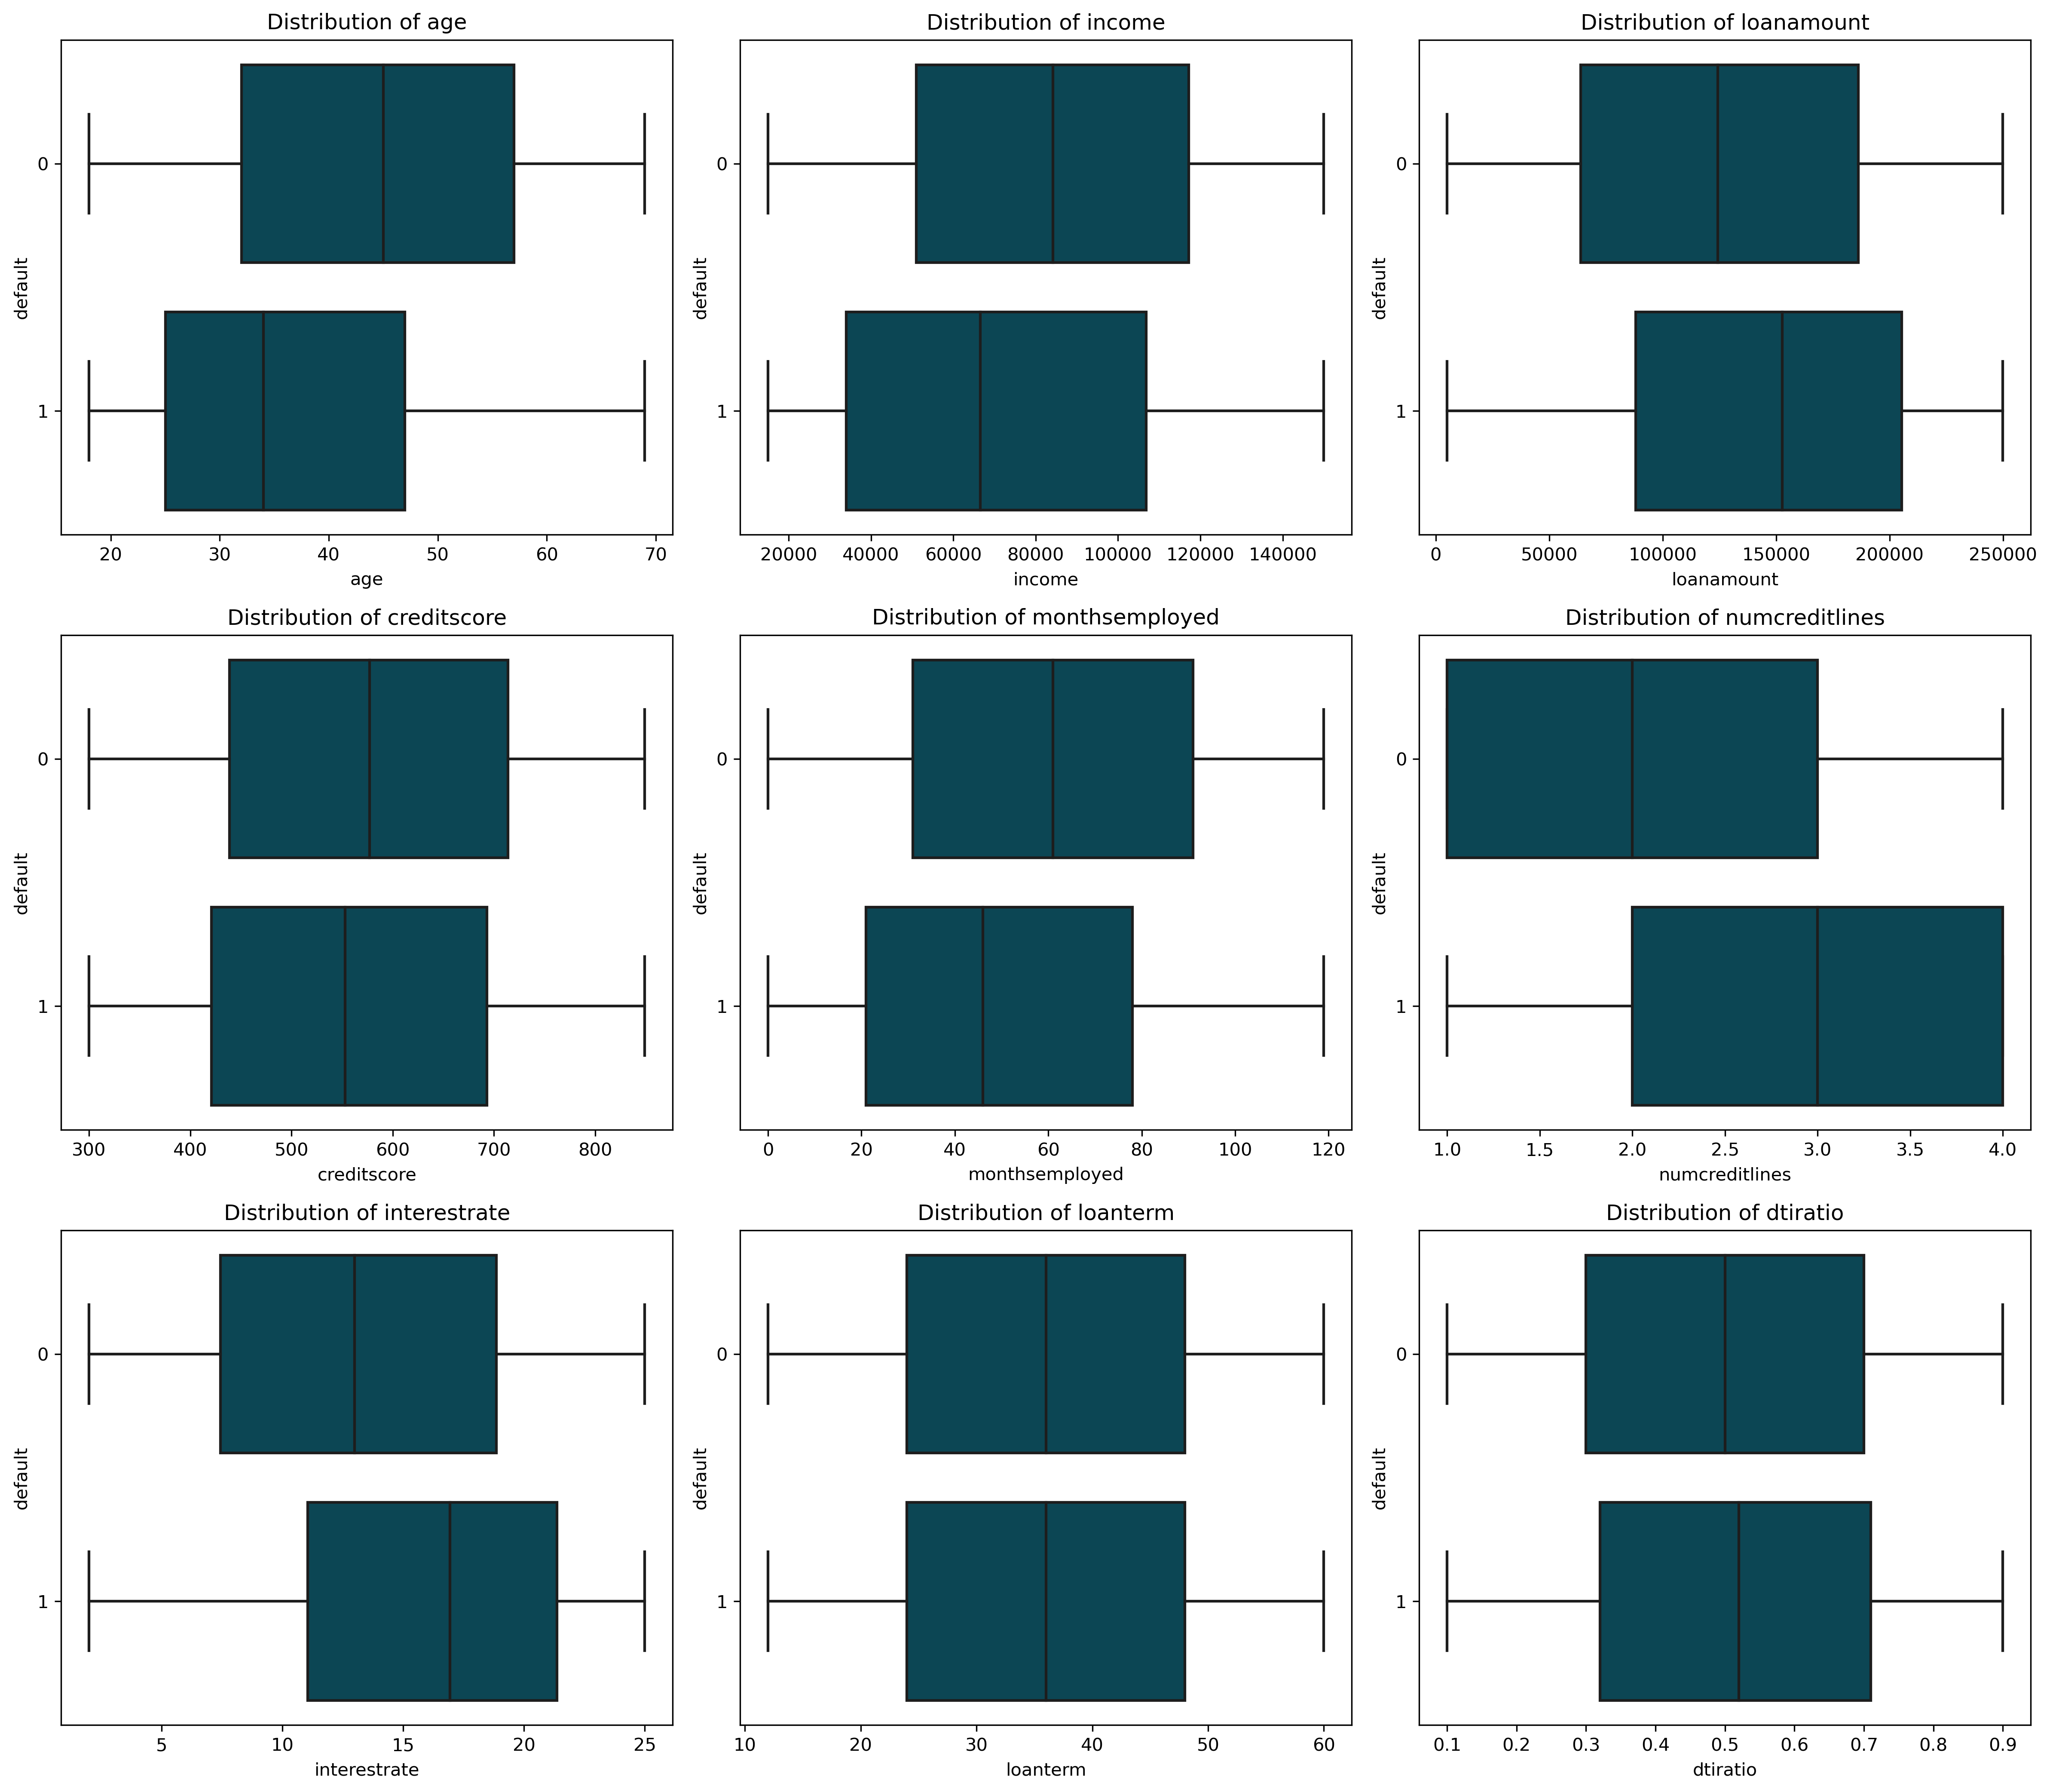

In [18]:
plt.figure(figsize=(16, 14), dpi=300)

for i, col in enumerate(data[NumCols].columns, 1):
    plt.subplot(3,3,i)
    plt.title(f"Distribution of {col}")
    
    sns.boxplot(x = data[col], y = data['default'], orient='h',  color='#004D60')

    plt.tight_layout()
    plt.plot()

### MUTUAL INFORMATION

In [19]:
from sklearn.metrics import mutual_info_score

def mis_score(series):
    return mutual_info_score(series, data.default)

target_mutual_info_score = (data.apply(mis_score).sort_values(ascending=False))

print(f'Mutual Information Score:\n\n{target_mutual_info_score}')

Mutual Information Score:

loanid            0.359139
default           0.359139
loanamount        0.250758
income            0.198405
age               0.014566
interestrate      0.013368
monthsemployed    0.005025
creditscore       0.001666
employmenttype    0.001050
hascosigner       0.000766
hasdependents     0.000602
education         0.000418
numcreditlines    0.000406
maritalstatus     0.000397
dtiratio          0.000359
hasmortgage       0.000261
loanpurpose       0.000256
loanterm          0.000001
dtype: float64


### Correlation

In [20]:
# Storing original column names
cols = list(data.columns)


print(catCols)
print(NumCols)



['education', 'employmenttype', 'maritalstatus', 'hasmortgage', 'hasdependents', 'loanpurpose', 'hascosigner']
['age', 'income', 'loanamount', 'creditscore', 'monthsemployed', 'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']


In [21]:
## dropping loanid
data_df = data.drop(columns='loanid')
data_df

age  income  loanamount  creditscore  monthsemployed  numcreditlines  \
0        56   85994       50587          520              80               4   
1        69   50432      124440          458              15               1   
2        46   84208      129188          451              26               3   
3        32   31713       44799          743               0               3   
4        60   20437        9139          633               8               4   
...     ...     ...         ...          ...             ...             ...   
255342   19   37979      210682          541             109               4   
255343   32   51953      189899          511              14               2   
255344   56   84820      208294          597              70               3   
255345   42   85109       60575          809              40               1   
255346   62   22418       18481          636             113               2   

        interestrate  loanterm  dtiratio    education employmenttype  \
0              15.23        36      0.44   Bachelor's      Full-time   
1               4.81        60      0.68     Master's      Full-time   
2              21.17        24      0.31     Master's     Unemployed   
3               7.07        24      0.23  High School      Full-time   
4               6.51        48      0.73   Bachelor's     Unemployed   
...              ...       ...       ...          ...            ...   
255342         14.11        12      0.85   Bachelor's      Full-time   
255343         11.55        24      0.21  High School      Part-time   
255344          5.29        60      0.50  High School  Self-employed   
255345         20.90        48      0.44  High School      Part-time   
255346          6.73        12      0.48   Bachelor's     Unemployed   

       maritalstatus hasmortgage hasdependents loanpurpose hascosigner  \
0           Divorced         Yes           Yes       Other         Yes   
1            Married          No            No       Other         Yes   
2           Divorced         Yes           Yes        Auto          No   
3            Married          No            No    Business          No   
4           Divorced          No           Yes        Auto          No   
...              ...         ...           ...         ...         ...   
255342       Married          No            No       Other          No   
255343      Divorced          No            No        Home          No   
255344       Married         Yes           Yes        Auto         Yes   
255345        Single         Yes           Yes       Other          No   
255346      Divorced         Yes            No   Education         Yes   

        default  
0             0  
1             0  
2             1  
3             0  
4             0  
...         ...  
255342        0  
255343        1  
255344        0  
255345        0  
255346        0  

[255347 rows x 17 columns]

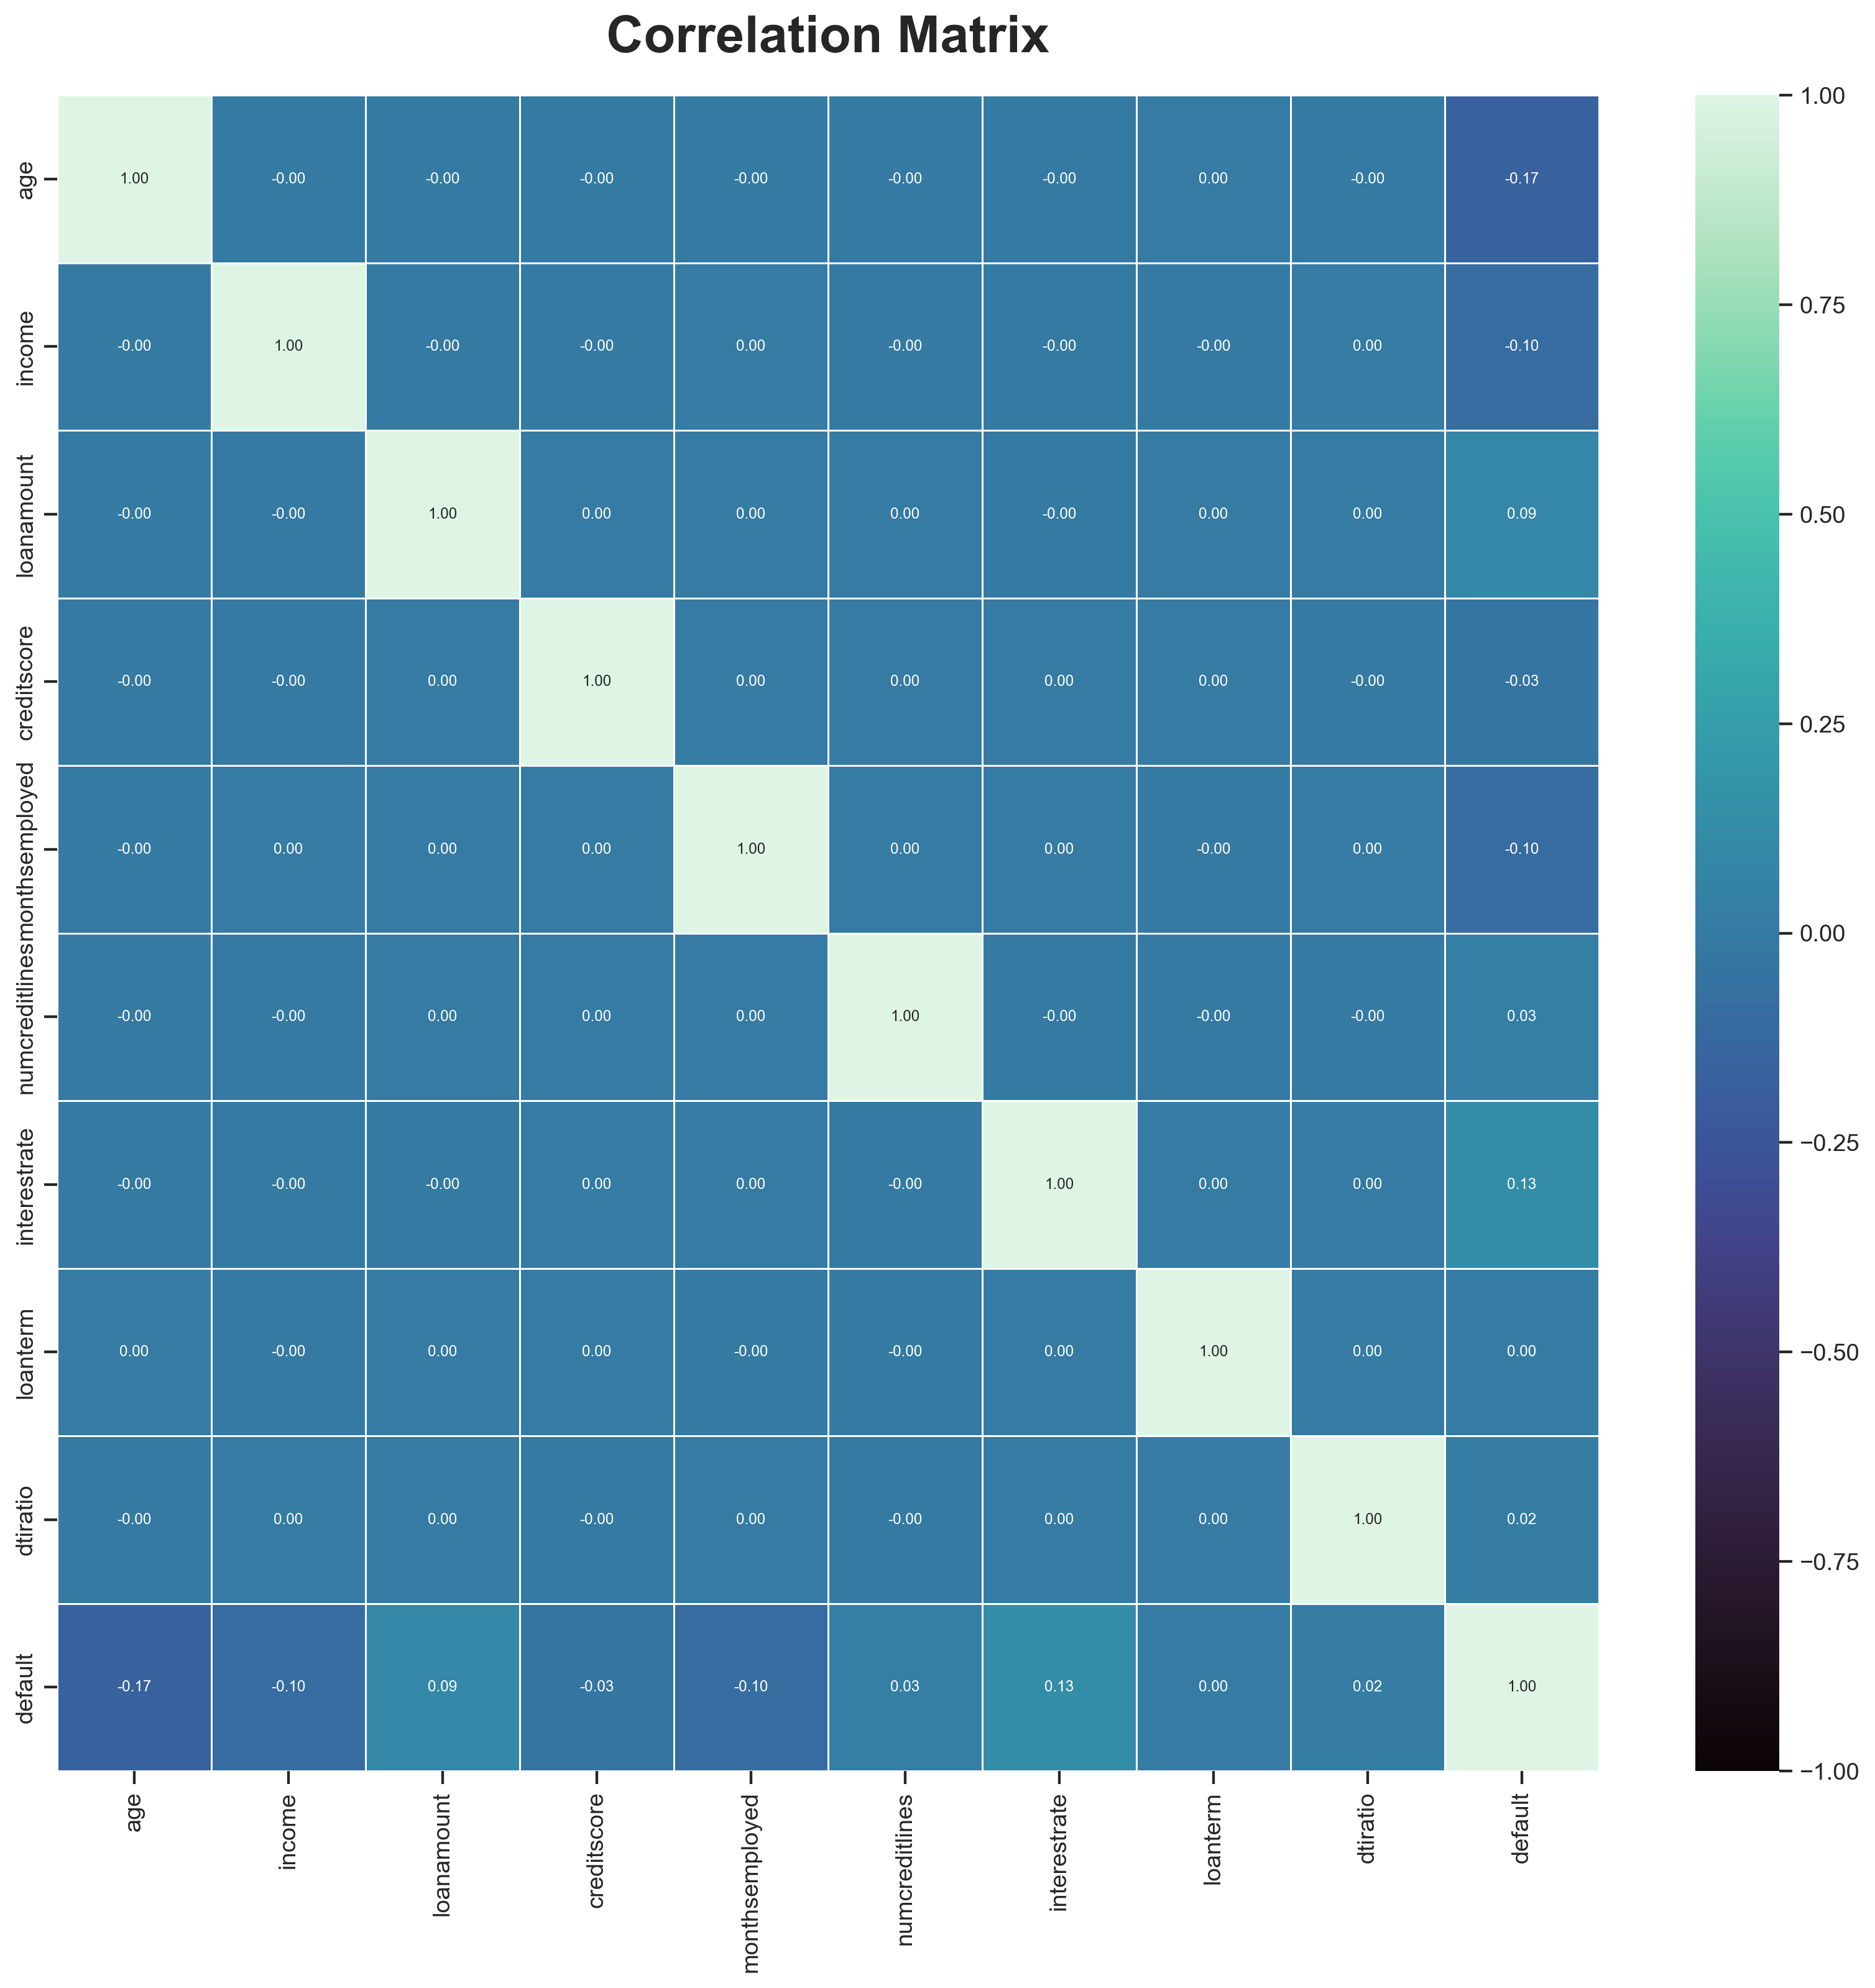

In [22]:
plt.figure(figsize=(16,14), dpi=250)
sns.set(style='ticks', palette='muted')

# Generate correlation matrix using Spearman correlation 
corr = data_df[NumCols + ['default']].corr(method='spearman')

ax1 = sns.heatmap((corr), linewidths=0.3, cmap='mako', annot = True, annot_kws = {'size': 7}, fmt='.2f', vmin=-1, vmax=1)

ax1.set_xticklabels(NumCols + ['default'])
ax1.set_yticklabels(NumCols + ['default'])

plt.title('Correlation Matrix', fontsize=24, fontweight='bold', pad=20)

plt.show()

### Label Encoder

In [23]:
catCols

['education',
 'employmenttype',
 'maritalstatus',
 'hasmortgage',
 'hasdependents',
 'loanpurpose',
 'hascosigner']

In [24]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for col in catCols:
    data[col] = le.fit_transform(data[col])
    
data = data.drop(['loanid'], axis=1)

In [25]:
data.head(10)

age  income  loanamount  creditscore  monthsemployed  numcreditlines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   
5   25   90298       90448          720              18               2   
6   38  111188      177025          429              80               1   
7   56  126802      155511          531              67               4   
8   36   42053       92357          827              83               1   
9   40  132784      228510          480             114               4   

   interestrate  loanterm  dtiratio  education  employmenttype  maritalstatus  \
0         15.23        36      0.44          0               0              0   
1          4.81        60      0.68          2               0              1   
2         21.17        24      0.31          2               3              0   
3          7.07        24      0.23          1               0              1   
4          6.51        48      0.73          0               3              0   
5         22.72        24      0.10          1               3              2   
6         19.11        12      0.16          0               3              2   
7          8.15        60      0.43          3               0              1   
8         23.94        48      0.20          0               2              0   
9          9.09        48      0.33          1               2              1   

   hasmortgage  hasdependents  loanpurpose  hascosigner  default  
0            1              1            4            1        0  
1            0              0            4            1        0  
2            1              1            0            0        1  
3            0              0            1            0        0  
4            0              1            0            0        0  
5            1              0            1            1        1  
6            1              0            3            1        0  
7            0              0            3            1        0  
8            1              0            2            0        1  
9            1              0            4            1        0

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             255347 non-null  int64  
 1   income          255347 non-null  int64  
 2   loanamount      255347 non-null  int64  
 3   creditscore     255347 non-null  int64  
 4   monthsemployed  255347 non-null  int64  
 5   numcreditlines  255347 non-null  int64  
 6   interestrate    255347 non-null  float64
 7   loanterm        255347 non-null  int64  
 8   dtiratio        255347 non-null  float64
 9   education       255347 non-null  int64  
 10  employmenttype  255347 non-null  int64  
 11  maritalstatus   255347 non-null  int64  
 12  hasmortgage     255347 non-null  int64  
 13  hasdependents   255347 non-null  int64  
 14  loanpurpose     255347 non-null  int64  
 15  hascosigner     255347 non-null  int64  
 16  default         255347 non-null  int64  
dtypes: float64

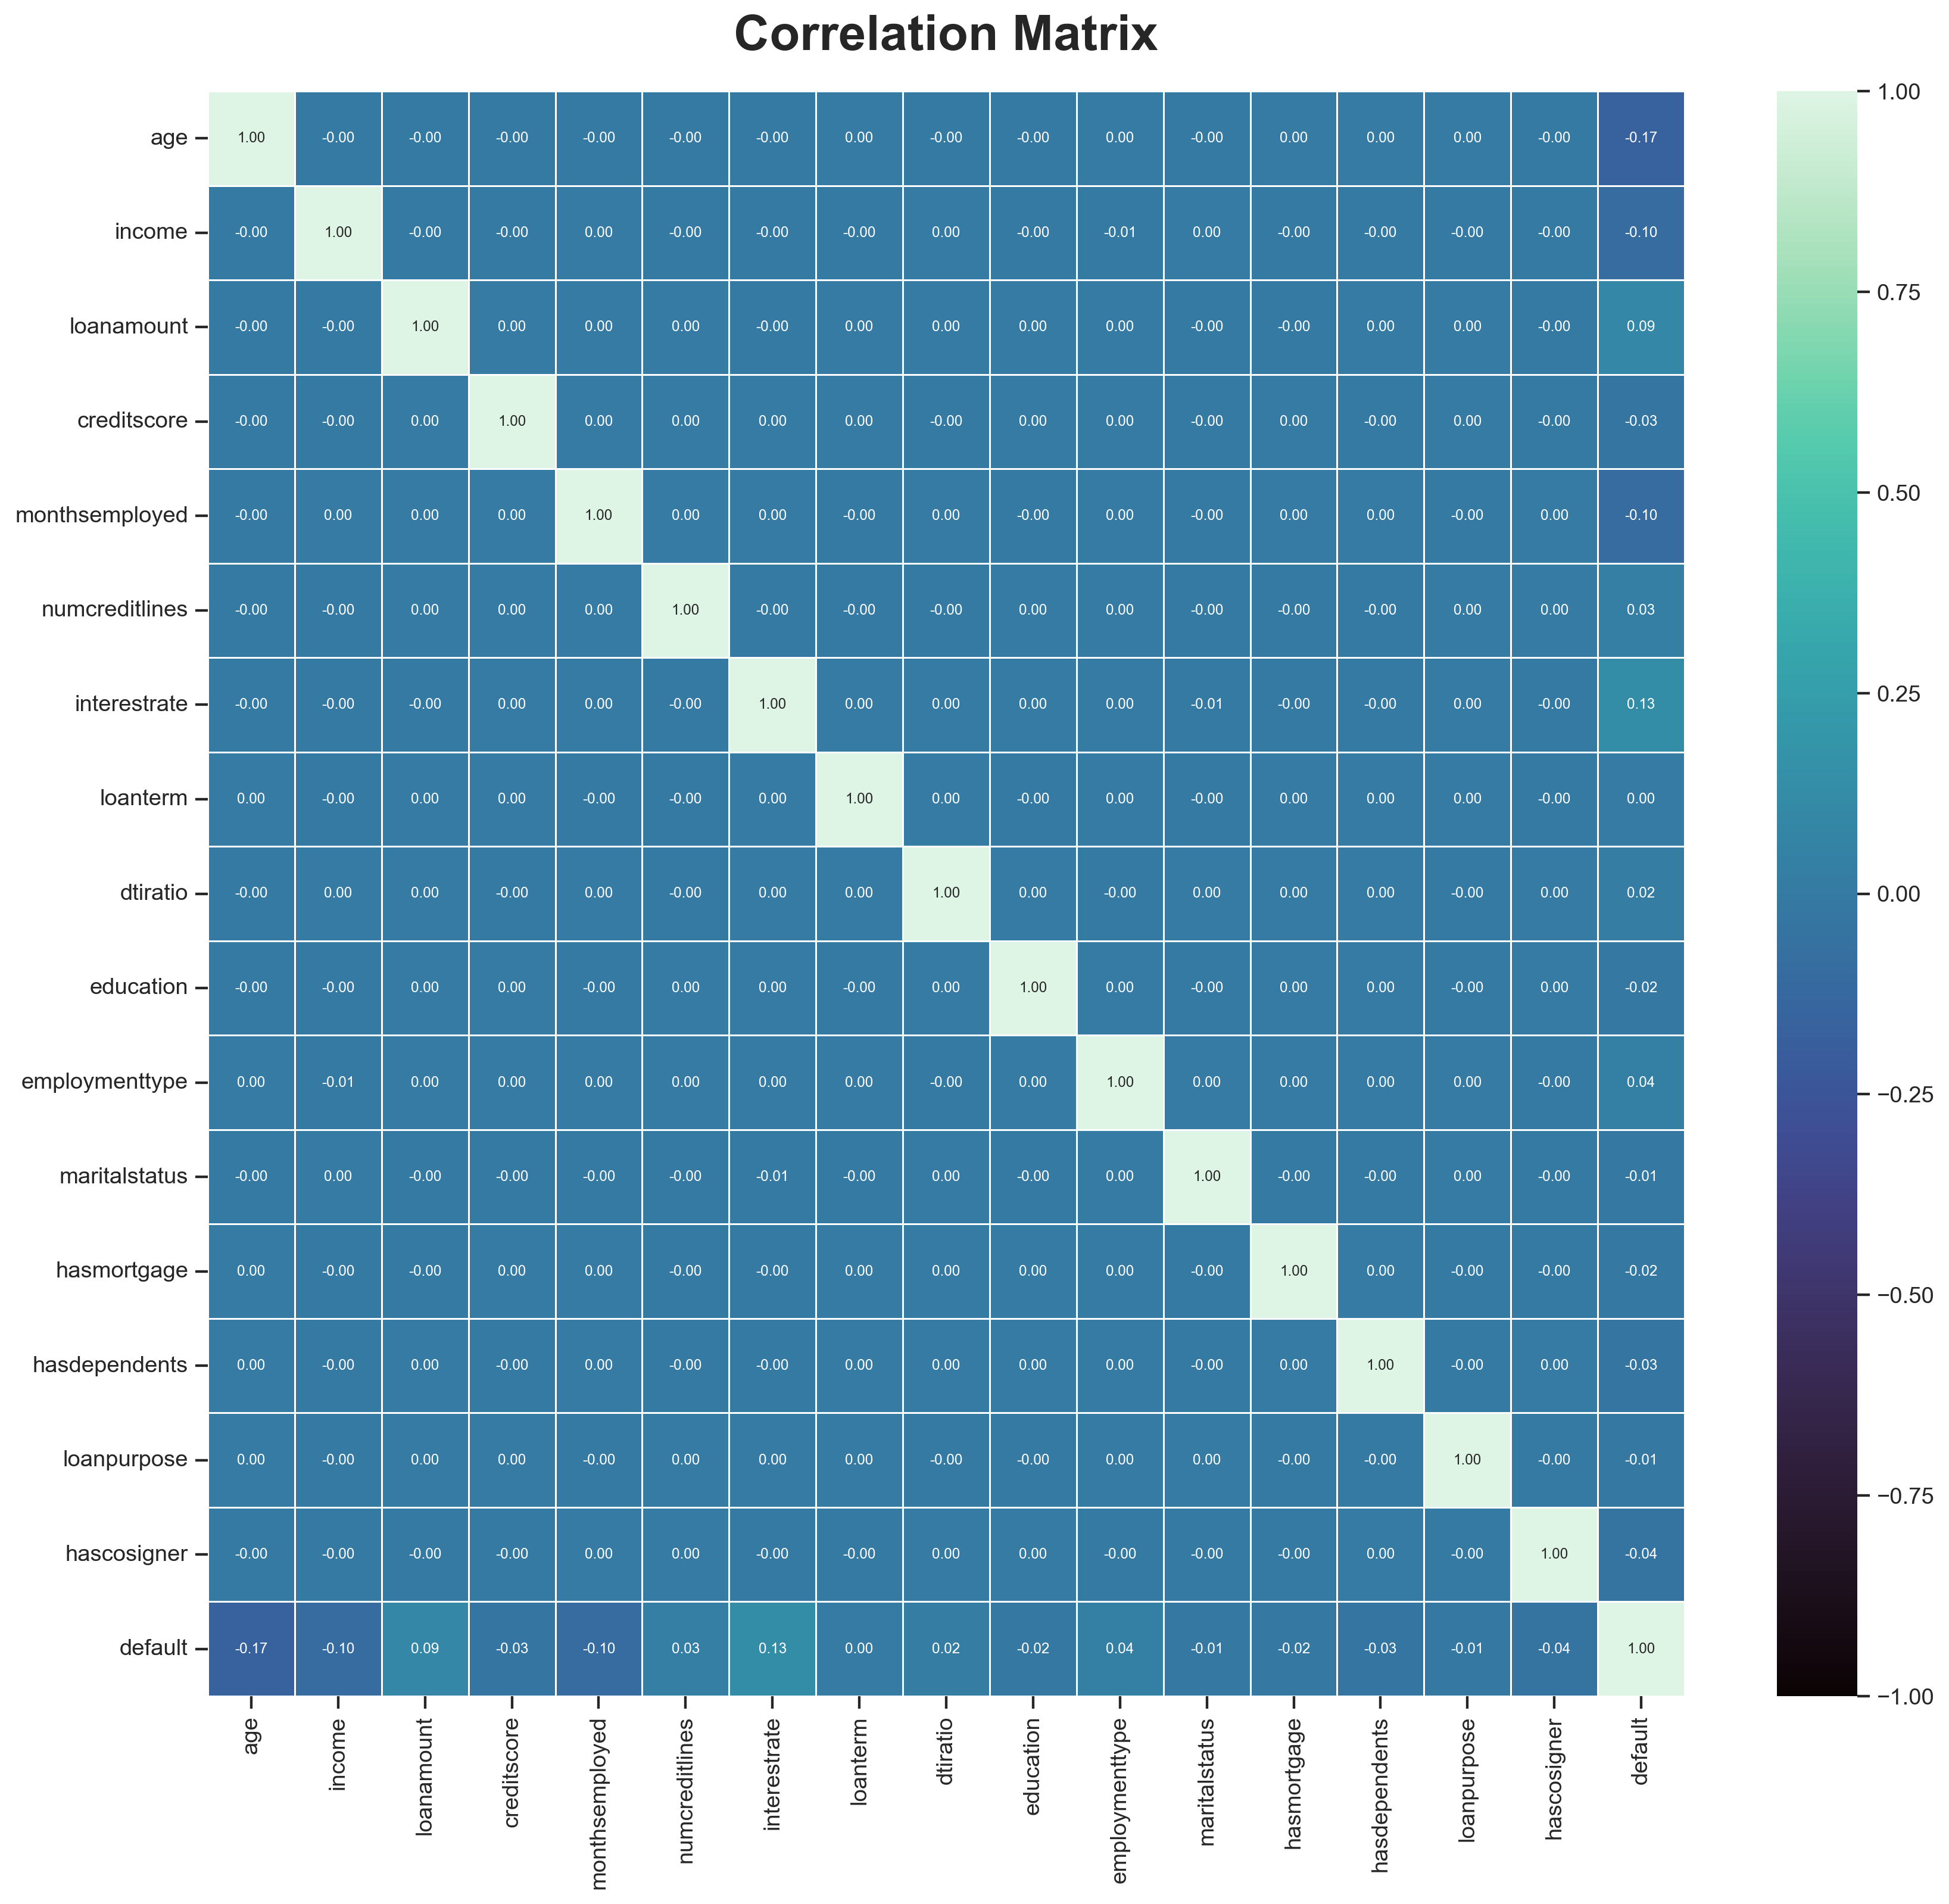

In [27]:
plt.figure(figsize=(16,14), dpi=250)
sns.set(style='ticks', palette='muted')

# Generate correlation matrix using Spearman correlation 
corr = data.corr(method='spearman')

ax1 = sns.heatmap((corr), linewidths=0.3, cmap='mako', annot = True, annot_kws = {'size': 7}, fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix', fontsize=24, fontweight='bold', pad=20)

plt.show()

In [28]:
from sklearn.model_selection import train_test_split, KFold

In [29]:
### Dataset for Model Development
from sklearn.model_selection import train_test_split


df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

In [30]:
print("Full data:", len(data))
print("Full train:", len(df_full_train))
print("Train:", len(df_train))
print("Validation:",len(df_val))
print("Test:", len(df_test))

Full data: 255347
Full train: 204277
Train: 153207
Validation: 51070
Test: 51070


In [31]:
## Feature importance using ROCAUC 
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, f1_score

In [32]:
for c in df_train.columns:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%16s, %.3f' % (c, auc))

             age, 0.650
          income, 0.588
      loanamount, 0.579
     creditscore, 0.531
  monthsemployed, 0.586
  numcreditlines, 0.526
    interestrate, 0.619
        loanterm, 0.502
        dtiratio, 0.516
       education, 0.520
  employmenttype, 0.537
   maritalstatus, 0.507
     hasmortgage, 0.519
   hasdependents, 0.526
     loanpurpose, 0.508
     hascosigner, 0.530


## Training the Model

In [33]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [34]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

### Exploring Linear Regression

In [35]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [36]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [37]:
roc_auc_score(y_val, y_pred)

0.7090906558161281

In [38]:
print("Linear Regresion Baseline Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Linear Regresion Baseline Model Scores
Roc Auc Score: 0.7090906558161281
Precision: 0.0
Recall: 0.0
F1 Score 0.0
Confusion Matrix: [[45136     0]
 [ 5934     0]]


## Exporing Decision Tree Classifier

In [39]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]

In [40]:
print("Decision Tree Baseline Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Decision Tree Baseline Model Scores
Roc Auc Score: 0.5569519843529922
Precision: 0.20443131462333824
Recall: 0.23323222109875294
F1 Score 0.21788413098236778
Confusion Matrix: [[39750  5386]
 [ 4550  1384]]


### Decision trees parameter tuning

* selecting `max_depth`
* selecting `min_samples_leaf`

In [41]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.612
   2 -> 0.654
   3 -> 0.681
   4 -> 0.702
   5 -> 0.712
   6 -> 0.719
  10 -> 0.708
  15 -> 0.604
  20 -> 0.552
None -> 0.554


In [42]:
from sklearn import metrics

In [43]:
scores = []

for depth in [5, 6, 7]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        f1_scores = metrics.f1_score(y_val, y_pred >= 0.5)
        
        scores.append((depth, s, auc, f1_scores))

In [44]:
columns = ['max_depth', 'min_samples_leaf', 'auc','f1_scores']
df_scores = pd.DataFrame(scores, columns=columns)

In [45]:
df_scores

max_depth  min_samples_leaf       auc  f1_scores
0           5                 1  0.711897   0.043259
1           5                 5  0.711897   0.043259
2           5                10  0.711897   0.043259
3           5                15  0.711897   0.043259
4           5                20  0.711897   0.043259
5           5               500  0.711853   0.043259
6           5               100  0.711897   0.043259
7           5               200  0.711897   0.043259
8           6                 1  0.718795   0.069546
9           6                 5  0.718453   0.069239
10          6                10  0.718453   0.069239
11          6                15  0.718453   0.069239
12          6                20  0.718453   0.069239
13          6               500  0.718728   0.070946
14          6               100  0.718455   0.072152
15          6               200  0.718455   0.072152
16          7                 1  0.720504   0.078334
17          7                 5  0.720553   0.078084
18          7                10  0.720497   0.078096
19          7                15  0.720510   0.078694
20          7                20  0.720548   0.091161
21          7               500  0.721595   0.070946
22          7               100  0.720354   0.071641
23          7               200  0.720378   0.089825

In [46]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             5      6      7
min_samples_leaf                     
1                 0.712  0.719  0.721
5                 0.712  0.718  0.721
10                0.712  0.718  0.720
15                0.712  0.718  0.721
20                0.712  0.718  0.721
100               0.712  0.718  0.720
200               0.712  0.718  0.720
500               0.712  0.719  0.722

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

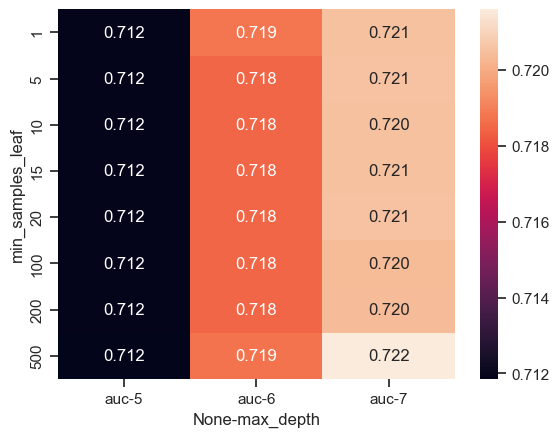

In [47]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [48]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)

In [49]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
f1_score_val = metrics.f1_score(y_val, y_pred >= 0.5)

print("auc:", auc)
print("f1 score:", f1_score_val)

auc: 0.7205480523857672
f1 score: 0.09116107175854635


In [50]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- age <= 39.50
|   |--- interestrate <= 15.01
|   |   |--- income <= 31964.00
|   |   |   |--- loanamount <= 147655.00
|   |   |   |   |--- loanamount <= 102468.00
|   |   |   |   |   |--- interestrate <= 7.17
|   |   |   |   |   |   |--- income <= 25261.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- income >  25261.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- interestrate >  7.17
|   |   |   |   |   |   |--- dtiratio <= 0.47
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- dtiratio >  0.47
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- loanamount >  102468.00
|   |   |   |   |   |--- monthsemployed <= 87.50
|   |   |   |   |   |   |--- interestrate <= 10.97
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- interestrate >  10.97
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- monthsemployed >  87.50
|   |   |   |   |   |   |--- age <= 24.50
|   |   |   | 

In [51]:
print("Decision Tree Best Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", metrics.f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Decision Tree Best Model Scores
Roc Auc Score: 0.7205480523857672
Precision: 0.5285714285714286
Recall: 0.04988203572632288
F1 Score 0.09116107175854635
Confusion Matrix: [[44872   264]
 [ 5638   296]]


## Exploring Random Forest Classifier

In [52]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

In [53]:
print("Random Forest Baseline Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", metrics.f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Random Forest Baseline Model Scores
Roc Auc Score: 0.7273447826242275
Precision: 0.5888429752066116
Recall: 0.04802831142568251
F1 Score 0.08881271424119663
Confusion Matrix: [[44937   199]
 [ 5649   285]]


In [54]:
## n_estimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    f1_score = metrics.f1_score(y_val, y_pred >= 0.5)
    
    scores.append((n, auc, f1_score))

In [56]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc', 'f1_score'])

df_scores

n_estimators       auc  f1_score
0             10  0.665695  0.187413
1             20  0.694113  0.134444
2             30  0.705792  0.121933
3             40  0.713330  0.109693
4             50  0.717846  0.103083
5             60  0.720684  0.099199
6             70  0.722828  0.096590
7             80  0.725023  0.091797
8             90  0.725917  0.087796
9            100  0.727345  0.088813
10           110  0.728909  0.088042
11           120  0.729418  0.086671
12           130  0.730602  0.083399
13           140  0.731468  0.081479
14           150  0.731893  0.081645
15           160  0.731747  0.079497
16           170  0.732032  0.079899
17           180  0.732225  0.079912
18           190  0.732716  0.080252
19           200  0.732950  0.079622

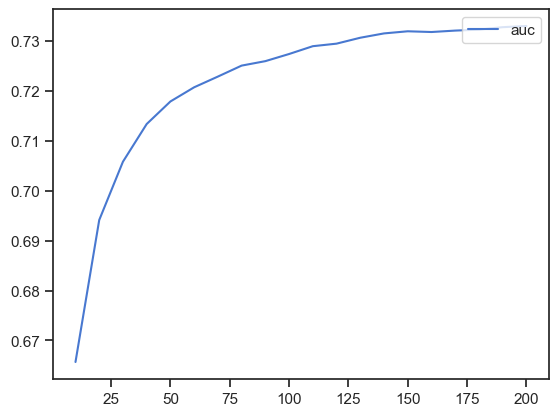

In [58]:
plt.plot(df_scores.n_estimators, df_scores.auc, "-b", label="auc") 
# plt.plot(df_scores.n_estimators, df_scores.f1_score, "-r", label="f1-score")
plt.legend(loc="upper right")
plt.show()

In [108]:
scores = []

for d in [5, 7, 9, 11]:
    for n in range(100, 200, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        # f1_score = metrics.f1_score(y_val, y_pred >= 0.5)

        scores.append((d, n, auc))

In [109]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores

max_depth  n_estimators       auc
0           5           100  0.734467
1           5           110  0.734443
2           5           120  0.734287
3           5           130  0.734732
4           5           140  0.734591
5           5           150  0.734627
6           5           160  0.734776
7           5           170  0.734968
8           5           180  0.734876
9           5           190  0.734855
10          7           100  0.742376
11          7           110  0.742328
12          7           120  0.742484
13          7           130  0.742594
14          7           140  0.742580
15          7           150  0.742596
16          7           160  0.742558
17          7           170  0.742607
18          7           180  0.742685
19          7           190  0.742640
20          9           100  0.745340
21          9           110  0.745362
22          9           120  0.745608
23          9           130  0.745681
24          9           140  0.745904
25          9           150  0.745972
26          9           160  0.745968
27          9           170  0.745949
28          9           180  0.745880
29          9           190  0.745913
30         11           100  0.745774
31         11           110  0.746130
32         11           120  0.746210
33         11           130  0.746383
34         11           140  0.746397
35         11           150  0.746473
36         11           160  0.746507
37         11           170  0.746579
38         11           180  0.746640
39         11           190  0.746780

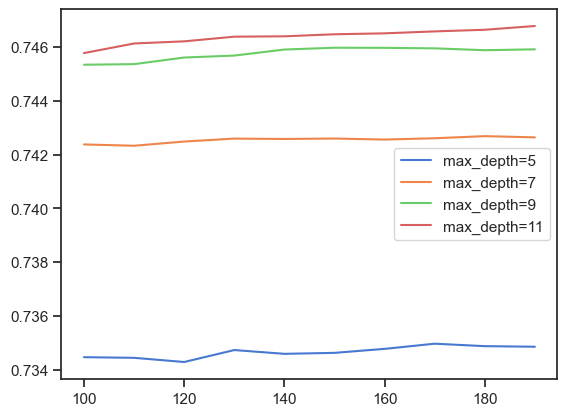

In [110]:
for d in [5, 7, 9, 11]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [111]:
max_depth = 7

In [112]:
scores = []

for s in [1, 3, 5, 10]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [113]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [118]:
df_scores[df_scores['min_samples_leaf'] == 5]

min_samples_leaf  n_estimators       auc
40                 5            10  0.737383
41                 5            20  0.739934
42                 5            30  0.740931
43                 5            40  0.741332
44                 5            50  0.741702
45                 5            60  0.742093
46                 5            70  0.742184
47                 5            80  0.741898
48                 5            90  0.741921
49                 5           100  0.742055
50                 5           110  0.742060
51                 5           120  0.742140
52                 5           130  0.742230
53                 5           140  0.742268
54                 5           150  0.742287
55                 5           160  0.742383
56                 5           170  0.742502
57                 5           180  0.742517
58                 5           190  0.742508
59                 5           200  0.742591

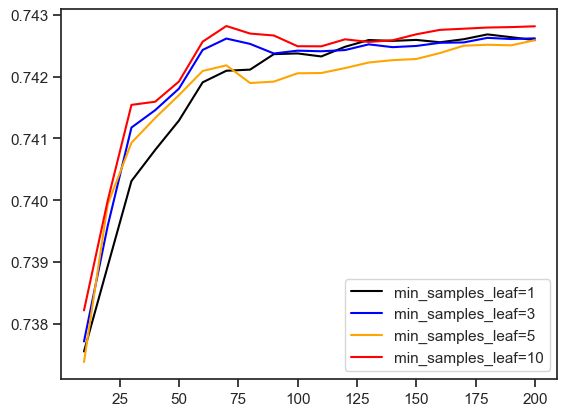

In [114]:
colors = ['black', 'blue', 'orange', 'red']
values = [1, 3, 5, 10]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [119]:
min_samples_leaf = 5

In [59]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=7,
                            min_samples_leaf=10,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=10, random_state=1)

In [60]:
y_pred = rf.predict_proba(X_val)[:, 1]

print("Random Foerst Best Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", metrics.f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Random Foerst Best Model Scores
Roc Auc Score: 0.7424933791080355
Precision: 0.7777777777777778
Recall: 0.0011796427367711494
F1 Score 0.002355712603062426
Confusion Matrix: [[45134     2]
 [ 5927     7]]


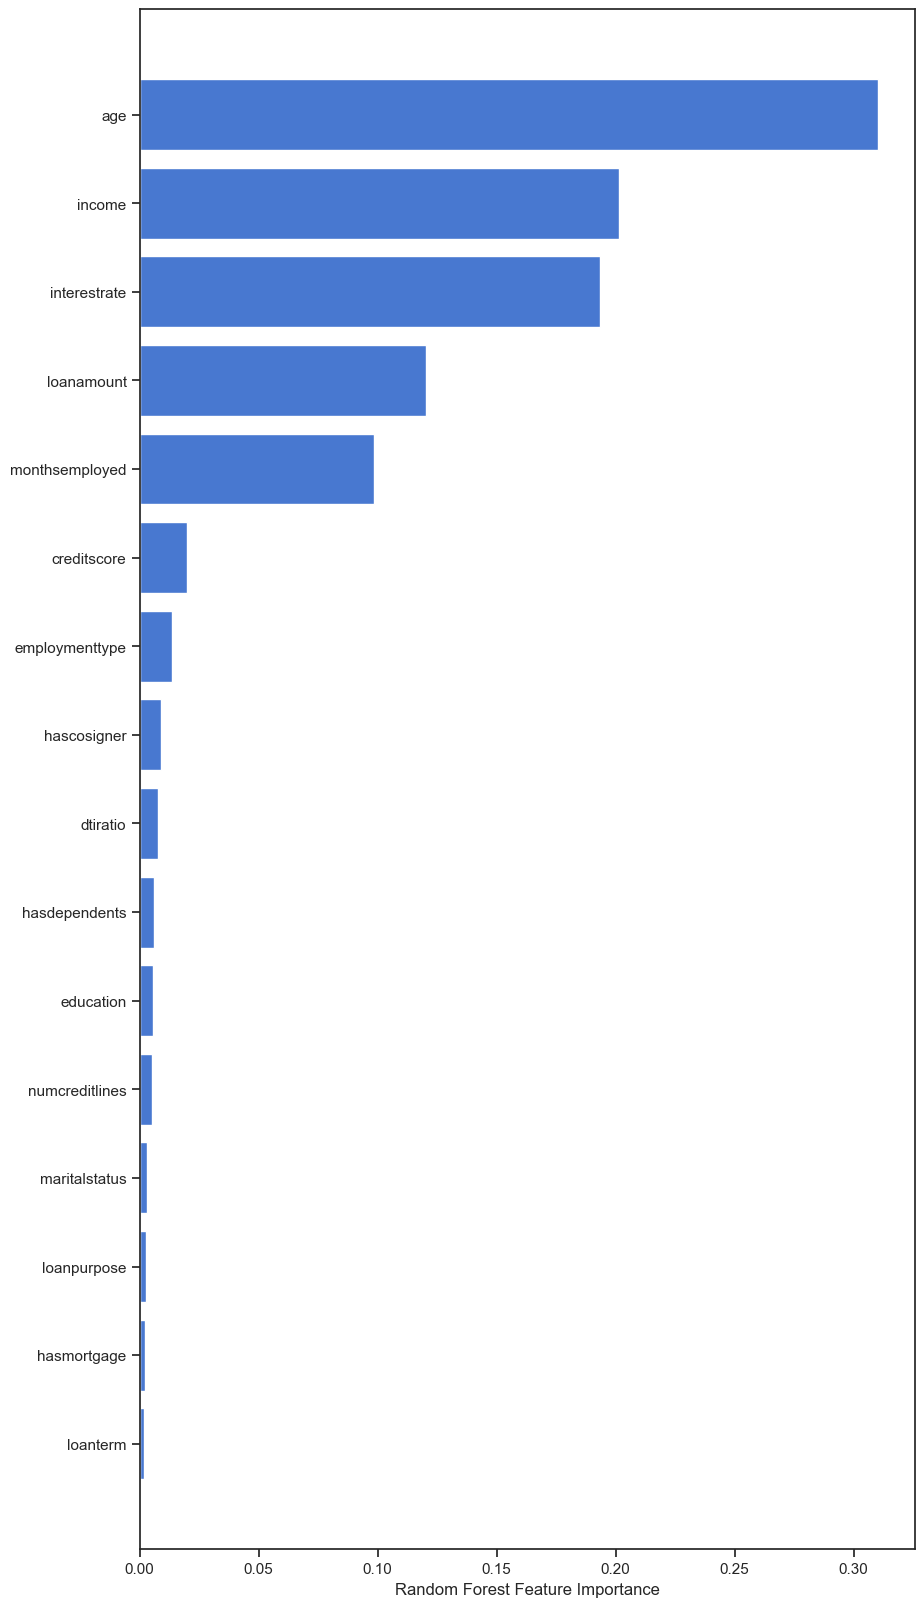

In [61]:
features = dv.get_feature_names_out()

sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

## Exploring XGBoost

In [62]:
# features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [63]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [64]:
y_pred = model.predict(dval)

roc_auc_score(y_val, y_pred)

0.7436411909206398

In [129]:
!pip3 install hyperopt

In [65]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
from hyperopt.pyll import scope

In [157]:
search_space = {
    'n_estimators' : hp.quniform('n_estimators', 100, 500, 50),
    'eta' : hp.quniform('eta', 0.01, 1, 0.01),
    'max_depth' : scope.int(hp.quniform('max_depth', 1, 10, 1)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.1, 1, 0.05),
    'gamma' : hp.quniform('gamma', 0.0, 1, 0.05),
    'scale_pos_weight': hp.quniform('scale_pos_weight', 0, 200, 10),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.1, 1, 0.05),

    # 'lambda': hp.uniform('lambda', 0, 1),
    # 'alpha': hp.uniform('alpha', 0, 1),

    'objective': 'binary:logistic',
    'eval_metric' : 'auc',

    'nthread': 16,
    'seed' : 1
}

In [138]:
X_full_train = df_full_train.drop('default', axis=1)
y_full_train = df_full_train['default']

In [144]:
features = list(X_full_train.columns)
features

['age',
 'income',
 'loanamount',
 'creditscore',
 'monthsemployed',
 'numcreditlines',
 'interestrate',
 'loanterm',
 'dtiratio',
 'education',
 'employmenttype',
 'maritalstatus',
 'hasmortgage',
 'hasdependents',
 'loanpurpose',
 'hascosigner']

In [159]:
def objective(params):
    # Initialize best model and score
    best_model = None
    best_score = float("-inf")

    kf = KFold(n_splits=5)
    auc_scores = []

    for train_index, val_index in kf.split(X_full_train, y_full_train):
        X_train, X_val = X_full_train.iloc[train_index], X_full_train.iloc[val_index]
        y_train, y_val = y_full_train.iloc[train_index].values, y_full_train.iloc[val_index].values


        # Create DMatrix for training and validation sets
        dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = features)
        dval = xgb.DMatrix(X_val, label=y_val, feature_names = features)

        model = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=150,
            evals=[(dtrain, 'training'), (dval, 'validation')],
            early_stopping_rounds=50
        )

        # y_pred_train = model.predict(dtrain)        
        y_pred = model.predict(dval)

        threshold = 0.5

        # y_pred_train = [1.0 if x > threshold else 0.0 for x in y_pred_train]
        y_pred_val = [1.0 if x > threshold else 0.0 for x in y_pred]

        auc_val = roc_auc_score(y_val, y_pred_val)

        auc_scores.append(auc_val)

    avg_auc = np.mean(auc_scores)    

    # # Update best model and score if current score is better
    # if avg_auc > best_score:
    #     best_score = avg_auc
    #     best_model = pickle.dumps(model)
   
    # 'precision': precision_val, 'recall': recall_val,
    return { 'loss': -avg_auc, 'status': STATUS_OK}


In [149]:
trials = Trials()
        # Use the fmin function from Hyperopt to find the best hyperparameters
best = fmin(fn=objective, space=search_space , algo=tpe.suggest, 
                    # trials=trials, 
                    max_evals=100,
                    trials=trials)

# print("Best Parameters are below")
# print(best)
print(space_eval(search_space, best))

# Save the best model
# with open("models/best_model_hyperopt_cv.pkl", "wb") as f:
#     f.write(best_model)

print(f"Best hyperparameters: {best}")

[0]	training-auc:0.74006	validation-auc:0.70267        
[1]	training-auc:0.74632	validation-auc:0.70838        
[2]	training-auc:0.74393	validation-auc:0.69870        
[3]	training-auc:0.75549	validation-auc:0.70255        
[4]	training-auc:0.75667	validation-auc:0.70269        
[5]	training-auc:0.76215	validation-auc:0.70479        
[6]	training-auc:0.76628	validation-auc:0.70428        
[7]	training-auc:0.76931	validation-auc:0.70202        
[8]	training-auc:0.77195	validation-auc:0.69866        
[9]	training-auc:0.77414	validation-auc:0.69565        
[10]	training-auc:0.77735	validation-auc:0.69552       
[11]	training-auc:0.78111	validation-auc:0.69478       
[12]	training-auc:0.78364	validation-auc:0.69174       
[13]	training-auc:0.78565	validation-auc:0.68966       
[14]	training-auc:0.78828	validation-auc:0.68659       
[15]	training-auc:0.79034	validation-auc:0.67933       
[16]	training-auc:0.79263	validation-auc:0.67926       
[17]	training-auc:0.79582	validation-auc:0.67749

In [ ]:
Best hyperparameters: {'alpha': 0.5043794359493297, 'colsample_bytree': 0.7000000000000001, 'eta': 0.07, 'gamma': 0.35000000000000003, 'lambda': 0.516633082422041, 'max_depth': 6.0, 'min_child_weight': 2.0, 'n_estimators': 150.0, 'scale_pos_weight': 10.0, 'subsample': 0.5}

In [68]:
best_params = {
 'alpha': 0.5043794359493297, 
 'colsample_bytree': 0.7000000000000001, 
 'eta': 0.07, 
 'gamma': 0.35000000000000003, 
 'lambda': 0.516633082422041,
 'max_depth': 6, 
 'min_child_weight': 2.0, 
 'n_estimators': 150.0, 
 'scale_pos_weight': 10.0, 
 'subsample': 0.5,
 
  'objective': 'binary:logistic',
  'eval_metric' : 'auc',
  'nthread': 8,
    
  'seed': 1,
  'verbosity': 1,
 }

In [69]:
model = xgb.train(best_params, dtrain, num_boost_round=200)

In [70]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.7472921611464739

In [72]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [73]:
%%capture output

model = xgb.train(best_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [74]:
s = output.stdout

In [75]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

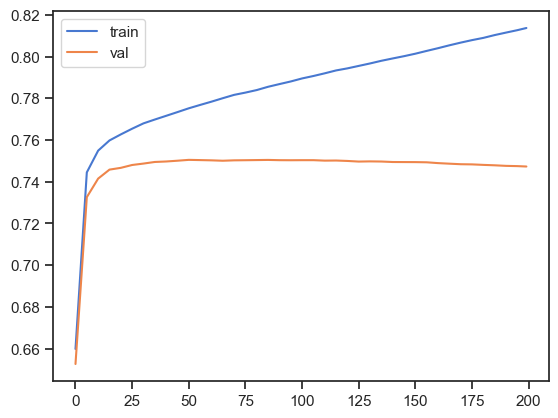

In [76]:
df_score = parse_xgb_output(output)

plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

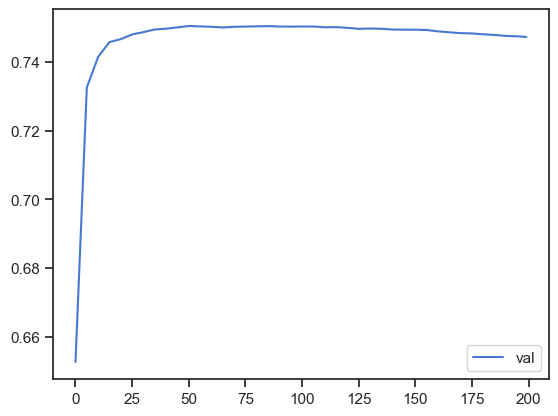

In [77]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## XGBoost parameter tuning

Tuning the following parameters:

* `eta`
* `max_depth`
* `min_child_weight`

In [78]:
scores = {}

In [83]:
%%capture output

xgb_params = {
 'alpha': 0.5043794359493297, 
 'colsample_bytree': 0.7000000000000001, 
 'eta': 0.7, 
 'gamma': 0.35000000000000003, 
 'lambda': 0.516633082422041,
 'max_depth': 6, 
 'min_child_weight': 2.0, 
 'n_estimators': 150.0, 
 'scale_pos_weight': 10.0, 
 'subsample': 0.5,
 
  'objective': 'binary:logistic',
  'eval_metric' : 'auc',
  'nthread': 8,
    
  'seed': 1,
  'verbosity': 1,
 }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [84]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.7'

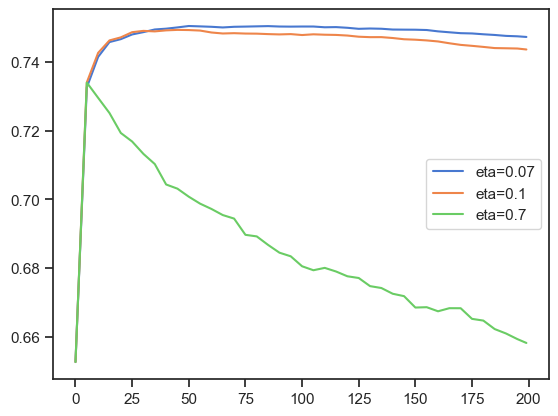

In [85]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

# plt.ylim(0.8, 0.84)
plt.legend()

In [86]:
scores = {}

In [95]:
%%capture output

xgb_params = {
 'alpha': 0.5043794359493297, 
 'colsample_bytree': 0.7000000000000001, 
 'eta': 0.07, 
 'gamma': 0.35000000000000003, 
 'lambda': 0.516633082422041,
 'max_depth': 4, 
 'min_child_weight': 2.0, 
 'n_estimators': 150.0, 
 'scale_pos_weight': 10.0, 
 'subsample': 0.5,
 
  'objective': 'binary:logistic',
  'eval_metric' : 'auc',
  'nthread': 8,
    
  'seed': 1,
  'verbosity': 1,
 }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [96]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

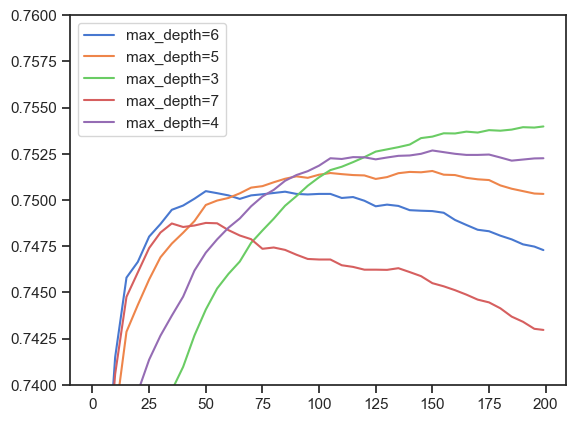

In [101]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.74, 0.76)
plt.legend()

In [ ]:
# eta = 0.07
# max_depth = 4

In [102]:
scores = {}

In [107]:
%%capture output

xgb_params = {
 'alpha': 0.5043794359493297, 
 'colsample_bytree': 0.7000000000000001, 
 'eta': 0.07, 
 'gamma': 0.35000000000000003, 
 'lambda': 0.516633082422041,
 'max_depth': 4, 
 'min_child_weight': 20.0, 
 'n_estimators': 150.0, 
 'scale_pos_weight': 10.0, 
 'subsample': 0.5,
 
  'objective': 'binary:logistic',
  'eval_metric' : 'auc',
  'nthread': 8,
    
  'seed': 1,
  'verbosity': 1,
 }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [108]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=20.0'

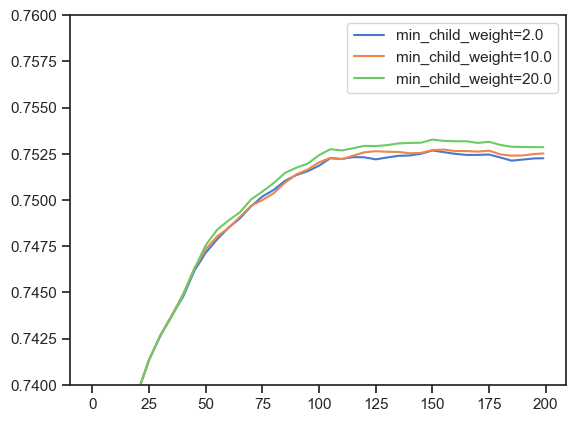

In [111]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.74, 0.76)
plt.legend()

In [112]:
xgb_params = {
#  'alpha': 0.5043794359493297, 
#  'colsample_bytree': 0.7000000000000001, 
 'eta': 0.07, 
#  'gamma': 0.35000000000000003, 
#  'lambda': 0.516633082422041,
 'max_depth': 4, 
 'min_child_weight': 20.0, 
 'n_estimators': 150.0, 
#  'scale_pos_weight': 10.0, 
#  'subsample': 0.5,
 
  'objective': 'binary:logistic',
  'eval_metric' : 'auc',
  'nthread': 8,
    
  'seed': 1,
  'verbosity': 1,
 }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.70442	val-auc:0.70248
[5]	train-auc:0.72266	val-auc:0.71826
[10]	train-auc:0.72935	val-auc:0.72506
[15]	train-auc:0.73515	val-auc:0.73029
[20]	train-auc:0.73852	val-auc:0.73295
[25]	train-auc:0.74201	val-auc:0.73569
[30]	train-auc:0.74521	val-auc:0.73833
[35]	train-auc:0.74836	val-auc:0.74089
[40]	train-auc:0.75082	val-auc:0.74255
[45]	train-auc:0.75319	val-auc:0.74435
[50]	train-auc:0.75542	val-auc:0.74573
[55]	train-auc:0.75729	val-auc:0.74701
[60]	train-auc:0.75858	val-auc:0.74777
[65]	train-auc:0.76001	val-auc:0.74881
[70]	train-auc:0.76114	val-auc:0.74941
[75]	train-auc:0.76212	val-auc:0.74997
[80]	train-auc:0.76296	val-auc:0.75039
[85]	train-auc:0.76390	val-auc:0.75100
[90]	train-auc:0.76458	val-auc:0.75130
[95]	train-auc:0.76526	val-auc:0.75162
[100]	train-auc:0.76594	val-auc:0.75198
[105]	train-auc:0.76651	val-auc:0.75221
[110]	train-auc:0.76704	val-auc:0.75244
[115]	train-auc:0.76747	val-auc:0.75256
[120]	train-auc:0.76791	val-auc:0.75258
[125]	train-auc:0.7682

In [113]:
y_pred = model.predict(dval)

roc_auc_score(y_val, y_pred)

0.7531761852312098

## Selecting the Final Model

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model
* selecting best model based on roc_auc_score and accuracy score

In [167]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)

In [168]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7205480523857672

In [169]:
accuracy_score(y_val, y_pred >= 0.5)

0.8844331309966712

In [170]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=7,
                            min_samples_leaf=10,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=10, random_state=1)

In [171]:
y_pred = rf.predict_proba(X_val)[:, 1]
print("ROC AUC score:", roc_auc_score(y_val, y_pred))
print("Accuracy Score:",accuracy_score(y_val, y_pred >= 0.5))

ROC AUC score: 0.7424933791080355
Accuracy Score: 0.8839044448795771


In [172]:
xgb_params = { 
 'eta': 0.07, 
 'max_depth': 4, 
 'min_child_weight': 20.0, 
 'n_estimators': 150.0, 
 
  'objective': 'binary:logistic',
  'eval_metric' : 'auc',
  'nthread': 8,
    
  'seed': 1,
  'verbosity': 1,
 }

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [173]:
y_pred = model.predict(dval)
print("ROC AUC score:", roc_auc_score(y_val, y_pred))
print("Accuracy Score:",accuracy_score(y_val, y_pred >= 0.5))

ROC AUC score: 0.7531761852312098
Accuracy Score: 0.8860387703152536


XGboost hyperparameter tuned has the best auc score of 0.753 on validation set. choosing it to run on full training dataset and checking performance on test set

In [140]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train['default'].values
y_test = df_test['default'].values

del df_full_train['default']
del df_test['default']

In [142]:
print(len(y_full_train))
print(len(y_test))

204277
51070


In [143]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

feature_names=dv.get_feature_names_out()

In [144]:
features = list(df_full_train.columns)

In [145]:
features

['age',
 'income',
 'loanamount',
 'creditscore',
 'monthsemployed',
 'numcreditlines',
 'interestrate',
 'loanterm',
 'dtiratio',
 'education',
 'employmenttype',
 'maritalstatus',
 'hasmortgage',
 'hasdependents',
 'loanpurpose',
 'hascosigner']

In [147]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names = features )

dtest = xgb.DMatrix(X_test,label=y_test, feature_names = features)

In [157]:
xgb_params = { 
 'eta': 0.07, 
 'max_depth': 4, 
 'min_child_weight': 20.0, 
 'n_estimators': 150.0, 
 
  'objective': 'binary:logistic',
  'eval_metric' : 'auc',
  'nthread': 8,
    
  'seed': 1,
  'verbosity': 1,
 }

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [158]:
y_pred = model.predict(dtest)

roc_auc_score(y_test, y_pred)

0.7566245827834923

In [166]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred >= 0.5)

0.887644409633836

#### Saving the Xgboost Model

In [159]:
import pickle

In [160]:
eta = 0.07

In [161]:
output_file = f'model_eta={eta}.bin'

In [162]:
output_file

'model_eta=0.07.bin'

In [163]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

In [164]:
!ls -lh *.bin

-rw-r--r--@ 1 avinashshruthi  staff   333K Dec 17 00:31 model_eta=0.07.bin


In [156]:
loan_app = df_test.head(1).to_dict('records')[0]

loan_app

{'age': 27,
 'income': 52584,
 'loanamount': 60095,
 'creditscore': 767,
 'monthsemployed': 110,
 'numcreditlines': 3,
 'interestrate': 2.1,
 'loanterm': 60,
 'dtiratio': 0.9,
 'education': 0,
 'employmenttype': 0,
 'maritalstatus': 1,
 'hasmortgage': 0,
 'hasdependents': 1,
 'loanpurpose': 3,
 'hascosigner': 0}